In [1]:
#Let's consider only most popular providers (>3% of dataset) and group all others to another group 'Other provider'
cnt = df_train[['payer_code', 'encounter_id']].groupby(by = 'payer_code').count().sort_values(by='encounter_id', ascending = False)
share = cnt/df_train['payer_code'].count()
big_share = share > 0.03
big_share_providers = list(big_share[big_share['encounter_id'] == True].index)
df_train['payer_code'] = df_train['payer_code'].apply(lambda x: x if x in big_share_providers else 'Other provider')

#one hot encoding for this variable since it has no order
#use drop='first' to avoid multicollinearity
encoder_payer_code = OneHotEncoder(sparse_output = False, drop='first')
one_hot_encoded = encoder_payer_code.fit_transform(df_train['payer_code'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_train
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, 
                                             columns=encoder_payer_code.get_feature_names_out(['payer_code']))], axis=1)

#Do the same thing for test, but only use big providers based on train dataset - put others to the group 'Other provider'
df_test['payer_code'] = df_test['payer_code'].apply(lambda x: x if x in big_share_providers else 'Other provider')
one_hot_encoded_test = encoder_payer_code.transform(df_test['payer_code'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_test
df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded_test, 
                                           columns=encoder_payer_code.get_feature_names_out(['payer_code']))], axis=1)


NameError: name 'df_train' is not defined

In [ ]:
#adding variables of total number of visits last year and max amount of visits of one type to data

df_train['total_visits'] = df_train['outpatient_visits_in_previous_year'] + df_train['emergency_visits_in_previous_year'] + df_train['inpatient_visits_in_previous_year']
df_test['total_visits'] = df_test['outpatient_visits_in_previous_year'] + df_test['emergency_visits_in_previous_year'] + df_test['inpatient_visits_in_previous_year']

df_train['max_visits_of_one_type'] = df_train[['outpatient_visits_in_previous_year',
          'emergency_visits_in_previous_year',
          'inpatient_visits_in_previous_year']].max(axis = 1)
df_test['max_visits_of_one_type'] = df_test[['outpatient_visits_in_previous_year',
          'emergency_visits_in_previous_year',
          'inpatient_visits_in_previous_year']].max(axis = 1)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5))

sns.countplot(x='inpatient_visits_in_previous_year', data=df_train, ax=axes[0])
sns.countplot(x='emergency_visits_in_previous_year', data=df_train, ax=axes[1])
sns.countplot(x='outpatient_visits_in_previous_year', data=df_train, ax=axes[2])
axes[0].set_title("Countplot of inpatient_visits_in_previous_year")
axes[1].set_title("Countplot of emergency_visits_in_previous_year")
axes[2].set_title("Countplot of outpatient_visits_in_previous_year")
plt.show()

Majority of people in dataset has their total amount of visits under 5 per year in each category. We will not delete any outliers but will replace extreme amount of visits with 5

In [ ]:
df_train['outpatient_visits_in_previous_year'] = df_train['outpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_train['emergency_visits_in_previous_year'] = df_train['emergency_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_train['inpatient_visits_in_previous_year'] = df_train['inpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_train['total_visits'] = df_train['total_visits'].apply(lambda x: 5 if x>5 else x)
df_train['max_visits_of_one_type'] = df_train['max_visits_of_one_type'].apply(lambda x: 5 if x>5 else x)

df_test['total_visits'] = df_test['total_visits'].apply(lambda x: 5 if x>5 else x)
df_test['max_visits_of_one_type'] = df_test['max_visits_of_one_type'].apply(lambda x: 5 if x>5 else x)
df_test['outpatient_visits_in_previous_year'] = df_test['outpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_test['emergency_visits_in_previous_year'] = df_test['emergency_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_test['inpatient_visits_in_previous_year'] = df_test['inpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)



In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

sns.countplot(x='inpatient_visits_in_previous_year', data=df_train, ax=axes[0])
sns.countplot(x='emergency_visits_in_previous_year', data=df_train, ax=axes[1])
sns.countplot(x='outpatient_visits_in_previous_year', data=df_train, ax=axes[2])
axes[0].set_title("Countplot of inpatient_visits_in_previous_year")
axes[1].set_title("Countplot of emergency_visits_in_previous_year")
axes[2].set_title("Countplot of outpatient_visits_in_previous_year")
plt.show()

In [ ]:
cnt = df_train[['encounter_id','average_pulse_bpm']].groupby(by = 'average_pulse_bpm').count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary','average_pulse_bpm']].groupby(by = 'average_pulse_bpm').mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False)

In [ ]:
grouped_data = df_train.groupby('average_pulse_bpm')['readmitted_binary'].mean()

# Sort specialties based on mean values
sorted_data = grouped_data.sort_index()

# Plot the results
plt.figure(figsize=(8, 4))
sorted_data.plot(kind='bar')
plt.title('Mean of Readmissions by BPM')
plt.ylabel('Mean of Readmissions')
plt.xlabel('Average BPM')
plt.show()

No correlation with target - seems like not very useful variable

In [ ]:
#check the distribution 
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.histplot(df_train['average_pulse_bpm'], bins=50, kde=False,  ax = axes[0])
axes[0].set_title('Histogram of average_pulse_bpm')

sns.kdeplot(df_train['average_pulse_bpm'],  fill=True)
axes[1].set_title('Kernel Density Plot of average_pulse_bpm')

plt.show()

For this feature we don't see any outliers or any other reasons to transform it right here - it will be scaled, but later during cross-validation and then for prediction phase

In [ ]:
i = 'length_of_stay_in_hospital'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['readmitted_binary'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
axes[0].set_title('Average readmitted binary by length')
sns.barplot(x=i, y='readmitted_binary', data=counts, ax=axes[1])
axes[1].set_title('Histogram of length_of_stay_in_hospital')

plt.show()

No outliers, no missing values, no need to change anything. In general, seems like it has positive correlation with r

In [ ]:
i = 'number_lab_tests'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['readmitted_binary'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.histplot(df_train[i], bins=50, kde=False,  ax = axes[1])
plt.show()

In [ ]:
#There are a lot of people that performed just one test - we will create separate variable to reflect this in case it is important
df_train['more_than_one_lab_test'] = (df_train['number_lab_tests'] > 1).astype(int)
df_test['more_than_one_lab_test'] = (df_test['number_lab_tests'] > 1).astype(int)

In [ ]:
# There are also some extreme values on the right wing which we will try to delete 
percentile_99 = np.percentile(df_train['number_lab_tests'], 99)

# Replace values greater than the 99th percentile with NaN
df_train['number_lab_tests'] = np.where(df_train['number_lab_tests'] > percentile_99, np.nan, df_train['number_lab_tests'])
df_test['number_lab_tests'] = np.where(df_test['number_lab_tests'] > percentile_99, np.nan, df_test['number_lab_tests'])
# We will fill this values later with Imputation

i = 'number_lab_tests'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['readmitted_binary'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.histplot(df_train[i], bins=50, kde=False,  ax = axes[1])
plt.show()

In [ ]:
i = 'non_lab_procedures'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['encounter_id'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.barplot(x=i, y='encounter_id', data=counts, ax=axes[1])
plt.show()

Number of non lab procedures seems to have a bit of negative correlation with target and has no outliers or missing values to process

In [ ]:
i = 'number_of_medications'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['encounter_id'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.histplot(df_train[i], bins=50, kde=False,  ax = axes[1])
plt.show()

In [ ]:
# Using same idea as with lab tests
percentile_99 = np.percentile(df_train['number_of_medications'], 99)

# Replace values greater than the 99th percentile with NaN
df_train['number_of_medications'] = np.where(df_train['number_of_medications'] > percentile_99, np.nan, df_train['number_of_medications'])
df_test['number_of_medications'] = np.where(df_test['number_of_medications'] > percentile_99, np.nan, df_test['number_of_medications'])
# We will fill this values later with Imputation

In [ ]:
i = 'number_of_medications'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['encounter_id'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.histplot(df_train[i], bins=50, kde=False,  ax = axes[1])
plt.show()

In [ ]:
i = 'number_diagnoses'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['encounter_id'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.barplot(x=i, y='encounter_id', data=counts, ax=axes[1])
plt.show()

In [ ]:
#Number of diagnosis > 9 is very rare, so we will use same logic as with patient visits

df_train['number_diagnoses'] = df_train['number_diagnoses'].apply(lambda x: 9 if x>9 else x)
df_test['number_diagnoses'] = df_test['number_diagnoses'].apply(lambda x: 9 if x>9 else x)


In [ ]:
i = 'number_diagnoses'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['encounter_id'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.barplot(x=i, y='encounter_id', data=counts, ax=axes[1])
plt.show()

Looks like very strong positive correlation - that might be useful

In [ ]:
df_train['readmitted_binary'].value_counts()/len(df_train['readmitted_binary'])

Since 11% people from train data was readmitted it can be useful benchmark to deal with some categorical data


In [ ]:
cnt = df_train[['encounter_id','admission_source']].fillna('Not known').groupby(by = 'admission_source').count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary','admission_source']].fillna('Not known').groupby(by = 'admission_source').mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False)

In [ ]:
# Variable doesn't seem very informative, since almost all observations are concentrated around 11,
# We will divide all admission_source data into 3 groups depending on the average of target variable in case if it helps

mean = df_train[['readmitted_binary','admission_source']].groupby(by = 'admission_source').mean().sort_values(by = 'readmitted_binary', ascending=False).reset_index()
mean['high_admission_source'] = mean['readmitted_binary'].apply(lambda x: 1 if x > 0.12 else 0)
mean['medium_admission_source'] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.12 and x > 0.10 else 0)
mean['low_admission_source'] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.10 else 0)
df_train = pd.merge(df_train, mean.drop(columns = 'readmitted_binary'), on = 'admission_source', how = 'left')
df_test = pd.merge(df_test, mean.drop(columns = 'readmitted_binary'), on = 'admission_source', how = 'left')
df_train[['high_admission_source', 
    'medium_admission_source', 
    'low_admission_source']] = df_train[['high_admission_source', 
    'medium_admission_source', 
    'low_admission_source']].fillna(0).astype(int)
df_test[['high_admission_source', 
    'medium_admission_source', 
    'low_admission_source']] = df_test[['high_admission_source', 
    'medium_admission_source', 
    'low_admission_source']].fillna(0).astype(int)


#Missing value are not informative, so we will not preprocess them anyhow

In [ ]:
cnt = df_train[['encounter_id','admission_type']].fillna('Not known').groupby(by = 'admission_type').count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary','admission_type']].fillna('Not known').groupby(by = 'admission_type').mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False)

In [ ]:
# There are not many admission types and they are not very informative 

#So we will just take biggest and proceed with on hot encoding
cnt = df_train[['admission_type', 'encounter_id']].groupby(by = 'admission_type').count().sort_values(by='encounter_id', ascending = False)
share = cnt/df_train['admission_type'].count()
big_share = share > 0.01
big_share_admissions = list(big_share[big_share['encounter_id'] == True].index)
df_train['admission_type_big_share'] = df_train['admission_type'].apply(lambda x: x if x in big_share_admissions else np.nan )
df_test['admission_type_big_share'] = df_test['admission_type'].apply(lambda x: x if x in big_share_admissions else np.nan )

#one hot encoding for this variable since it has no order
encoder_admission_type = OneHotEncoder(sparse_output = False)
one_hot_encoded = encoder_admission_type.fit_transform(df_train['admission_type_big_share'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_train
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_admission_type.get_feature_names_out(['admission_type_big_share']))], axis=1)
df_train.drop(columns = 'admission_type_big_share_nan', inplace = True)

one_hot_encoded = encoder_admission_type.transform(df_test['admission_type_big_share'].values.reshape(-1, 1))
df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded, columns=encoder_admission_type.get_feature_names_out(['admission_type_big_share']))], axis=1)
df_test.drop(columns = 'admission_type_big_share_nan', inplace = True)
df_train.columns

In [ ]:
grouped_data = df_train.groupby('medical_specialty')['readmitted_binary'].mean()

import matplotlib.pyplot as plt

# Sort specialties based on mean values
sorted_data = grouped_data.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(9, 4))
sorted_data.plot(kind='bar', color='skyblue')
plt.title('Mean of Readmissions by Medical Specialty')
plt.ylabel('Mean of Readmissions')
plt.xlabel('Medical Specialty')
plt.show()

In [ ]:
#half the values are missing for the medical specialty 
df_train['medical_specialty'].isna().mean() 

In [ ]:
#we will create  new variable reflecting this
df_train['no_medical_specialty'] = df_train['medical_specialty'].apply(lambda x: 1 if pd.isna(x) else 0) 
df_test['no_medical_specialty'] = df_test['medical_specialty'].apply(lambda x: 1 if pd.isna(x) else 0) 

In [ ]:
# We will divide all medical data into 3 groups depending on the average of target variable
mean = df_train[['readmitted_binary','medical_specialty']].groupby(by = 'medical_specialty').mean().sort_values(by = 'readmitted_binary', ascending=False).reset_index()
mean['high_medical_specialty'] = mean['readmitted_binary'].apply(lambda x: 1 if x > 0.12 else 0)
mean['medium_medical_specialty'] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.12 and x > 0.10 else 0)
mean['low_medical_specialty'] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.10 else 0)
df_train = pd.merge(df_train, mean.drop(columns = 'readmitted_binary'), on = 'medical_specialty', how = 'left')
df_test = pd.merge(df_test, mean.drop(columns = 'readmitted_binary'), on = 'medical_specialty', how = 'left')
df_train[['high_medical_specialty', 
    'medium_medical_specialty', 
    'low_medical_specialty']] = df_train[['high_medical_specialty', 
    'medium_medical_specialty', 
    'low_medical_specialty']].fillna(0).astype(int)
df_test[['high_medical_specialty', 
    'medium_medical_specialty', 
    'low_medical_specialty']] = df_test[['high_medical_specialty', 
    'medium_medical_specialty', 
    'low_medical_specialty']].fillna(0).astype(int)

In [ ]:

cnt = df_train[['encounter_id','discharge_disposition']].fillna('Not known').groupby(by = 'discharge_disposition').count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary','discharge_disposition']].fillna('Not known').groupby(by = 'discharge_disposition').mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False)

In [ ]:
# This variable has higher variety of categories and some of them represent data in a very good way
# So we will keep some of them as separate categories and process others as before

# We see that people transferred home/hospice are coming back very rare, so let's keep at as separate group
df_train['discharged_home_hospice'] = df_train['discharge_disposition'].apply(lambda x: 
                                                                              1 if (x == 'Discharged to home'
                                                                                   or x == 'Hospice / medical facility'
                                                                                   or x == 'Hospice / home'
                                                                                   or x == 'Discharged/transferred to a long term care hospital.')
                                                                              else 0)
df_test['discharged_home_hospice'] = df_test['discharge_disposition'].apply(lambda x: 
                                                                              1 if (x == 'Discharged to home'
                                                                                   or x == 'Hospice / medical facility'
                                                                                   or x == 'Hospice / home'
                                                                                   or x == 'Discharged/transferred to a long term care hospital.')
                                                                              else 0)

# if person expired he is not coming back - let's keep it as separate value since it's 100% sure indicator
df_train['expired'] = df_train['discharge_disposition'].fillna('').apply(lambda x: 1 if 'Expired' in x else 0)
df_test['expired'] = df_test['discharge_disposition'].fillna('').apply(lambda x: 1 if 'Expired' in x else 0)

# For other categories same logic as with medical specialty but with different boundaries
mean = df_train[['readmitted_binary','discharge_disposition']].groupby(by = 'discharge_disposition').mean().sort_values(by = 'readmitted_binary', ascending=False).reset_index()
mean['very_high_discharge_disposition'] = mean['readmitted_binary'].apply(lambda x: 1 if x >= 0.14 else 0)
mean['high_discharge_disposition'] = mean['readmitted_binary'].apply(lambda x: 1 if x > 0.12 and x < 0.14 else 0)
mean['medium_discharge_disposition'] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.12 and x > 0.10 else 0)
# no group for low since we already preprocessed almost all of them in two other caregories

df_train = pd.merge(df_train, mean.drop(columns = 'readmitted_binary'), on = 'discharge_disposition', how = 'left')
df_test = pd.merge(df_test, mean.drop(columns = 'readmitted_binary'), on = 'discharge_disposition', how = 'left')

df_train[['very_high_discharge_disposition','high_discharge_disposition', 
    'medium_discharge_disposition']] = df_train[['very_high_discharge_disposition','high_discharge_disposition', 
                                                'medium_discharge_disposition']].fillna(0).astype(int)
df_test[['very_high_discharge_disposition', 'high_discharge_disposition', 
    'medium_discharge_disposition']] = df_test[['very_high_discharge_disposition','high_discharge_disposition', 
                                                'medium_discharge_disposition']].fillna(0).astype(int)


https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp/physicians/diagnostic-code-descriptions-icd-9
https://dexur.com/icd9/

- 001 - 139.9   Infection and Parasitic Diseases
- 140 - 239.9	Neoplasms
- 240 - 279.9	Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders
- 280 - 289.9	Diseases of Blood and Blood Forming Organs 
- 290 - 319	    Mental Disorders 
- 320 - 389.9	Diseases of Nervous System and Sense Organs 
- 390 - 459.9	Diseases of the Circulatory System 
- 460 - 519.9	Diseases of the Respiratory System 
- 520 - 579.9	Diseases of the Digestive System 
- 580 - 629.9	Diseases of the Genitourinary System 
- 630 - 676.9	Complications of Pregnancy, Childbirth and the Puerperium 
- 680 - 709.9	Diseases of the Skin and Subcutaneous Tissue 
- 710 - 739.9	Diseases of the Musculoskeletal System and Connective Tissue 
- 740 - 759.9	Congenital Anomalies 
- 760 - 779.9	Certain Conditions Originating in the Perinatal Period
- 780 - 799.9	Symptoms, Signs and Ill-defined Conditions 
- 800 - 999.9 	Injury and Poisoning 
- V01 - V82.9	Supplementary Factors Influencing Health Status and Contact with Health Services
- E000-E999     Supplementary Classification Of External Causes Of Injury And Poisoning

In [ ]:
def categorize_diagnosis(code):
    if pd.isna(code):
        return np.nan
    if 'V' in code:
        return 'Supplementary Factors Influencing Health Status and Contact with Health Services'
    if 'E' in code:
        return 'Supplementary Classification Of External Causes Of Injury And Poisoning'
    else:
        code = int(code.split('.')[0]) 
    if 1 <= code <= 139:
        return 'Infection and Parasitic Diseases'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    elif 240 <= code <= 279:
        return 'Endocrine, Nutritional and Metabolic Diseases and Immunity Disorders'
    elif 280 <= code <= 289:
        return 'Diseases of Blood and Blood Forming Organs'
    elif 290 <= code <= 319:
        return 'Mental Disorders'
    elif 320 <= code <= 389:
        return 'Diseases of Nervous System and Sense Organs'
    elif 390 <= code <= 459:
        return 'Diseases of the Circulatory System'
    elif 460 <= code <= 519:
        return 'Diseases of the Respiratory System'
    elif 520 <= code <= 579:
        return 'Diseases of the Digestive System'
    elif 580 <= code <= 629:
        return 'Diseases of the Genitourinary System'
    elif 630 <= code <= 676:
        return 'Complications of Pregnancy, Childbirth and the Puerperium'
    elif 680 <= code <= 709:
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif 710 <= code <= 739:
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif 740 <= code <= 759:
        return 'Congenital Anomalies'
    elif 760 <= code <= 779:
        return 'Certain Conditions Originating in the Perinatal Period'
    elif 780 <= code <= 799:
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif 800 <= code <= 999:
        return 'Injury and Poisoning'
    else:
        return 'Unknown category'

In [ ]:
df_train['primary_diagnosis_category'] = df_train['primary_diagnosis'].apply(lambda x: categorize_diagnosis(x))
df_test['primary_diagnosis_category'] = df_test['primary_diagnosis'].apply(lambda x: categorize_diagnosis(x))

df_train['secondary_diagnosis_category'] = df_train['secondary_diagnosis'].apply(lambda x: categorize_diagnosis(x))
df_test['secondary_diagnosis_category'] = df_test['secondary_diagnosis'].apply(lambda x: categorize_diagnosis(x))

df_train['additional_diagnosis_category'] = df_train['additional_diagnosis'].apply(lambda x: categorize_diagnosis(x))
df_test['additional_diagnosis_category'] = df_test['additional_diagnosis'].apply(lambda x: categorize_diagnosis(x))

In [ ]:
i = 'additional_diagnosis_category'
# df[
cnt = df_train[['encounter_id',i]].fillna('Not known').groupby(by = i).count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary',i]].fillna('Not known').groupby(by = i).mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False).head(50)

We will do same encoding as we did with admission and discharge variables. And we will do it separately for each diagnosis (primary, secondary, additional), since some diagnoses being primary and secondary might have different impact

In [ ]:
i = 'primary_diagnosis_category'
mean = df_train[['readmitted_binary',i]].groupby(by = i).mean().sort_values(by = 'readmitted_binary', ascending=False)
mean['high_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x > 0.12 else 0)
mean['medium_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.12 and x > 0.10 else 0)
mean['low_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.10 else 0)

df_train = pd.merge(df_train, mean.drop(columns = 'readmitted_binary'), on = i, how = 'left')
df_test = pd.merge(df_test, mean.drop(columns = 'readmitted_binary'), on = i, how = 'left')

df_train[['high_' + i, 'medium_' + i, 'low_' + i]] = df_train[['high_' + i, 'medium_' + i, 'low_' + i]].fillna(0).astype(int)
df_test[['high_' + i, 'medium_' + i, 'low_' + i]] = df_test[['high_' + i, 'medium_' + i, 'low_' + i]].fillna(0).astype(int)


In [ ]:
i = 'secondary_diagnosis_category'
mean = df_train[['readmitted_binary',i]].groupby(by = i).mean().sort_values(by = 'readmitted_binary', ascending=False)
mean['high_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x > 0.12 else 0)
mean['medium_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.12 and x > 0.10 else 0)
mean['low_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.10 else 0)

df_train = pd.merge(df_train, mean.drop(columns = 'readmitted_binary'), on = i, how = 'left')
df_test = pd.merge(df_test, mean.drop(columns = 'readmitted_binary'), on = i, how = 'left')

df_train[['high_' + i, 'medium_' + i, 'low_' + i]] = df_train[['high_' + i, 'medium_' + i, 'low_' + i]].fillna(0).astype(int)
df_test[['high_' + i, 'medium_' + i, 'low_' + i]] = df_test[['high_' + i, 'medium_' + i, 'low_' + i]].fillna(0).astype(int)


In [ ]:
i = 'additional_diagnosis_category'
mean = df_train[['readmitted_binary',i]].groupby(by = i).mean().sort_values(by = 'readmitted_binary', ascending=False)
mean['high_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x > 0.12 else 0)
mean['medium_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.12 and x > 0.10 else 0)
mean['low_' + i] = mean['readmitted_binary'].apply(lambda x: 1 if x <= 0.10 else 0)

df_train = pd.merge(df_train, mean.drop(columns = 'readmitted_binary'), on = i, how = 'left')
df_test = pd.merge(df_test, mean.drop(columns = 'readmitted_binary'), on = i, how = 'left')

df_train[['high_' + i, 'medium_' + i, 'low_' + i]] = df_train[['high_' + i, 'medium_' + i, 'low_' + i]].fillna(0).astype(int)
df_test[['high_' + i, 'medium_' + i, 'low_' + i]] = df_test[['high_' + i, 'medium_' + i, 'low_' + i]].fillna(0).astype(int)



From what i found we can try to sort diabetes types by severity and make some order to create new variable

To make it more simple let's consider only 4 digits of code for this task. Here are the diagnoses according to what i found:

1. Non-specific code 250 Diabetes mellitus
2. Non-specific code 250.0 Diabetes mellitus without mention of complication
3. Non-specific code 250.9 Diabetes with unspecified complication
4. Non-specific code 250.8 Diabetes with other specified manifestations
5. Non-specific code 250.7 Diabetes with peripheral circulatory disorders
6. Non-specific code 250.6 Diabetes with neurological manifestations
7. Non-specific code 250.5 Diabetes with ophthalmic manifestations
8. Non-specific code 250.4 Diabetes with renal manifestations
9. Non-specific code 250.3 Diabetes with other coma
10. Non-specific code 250.2 Diabetes with hyperosmolarity
11. Non-specific code 250.1 Diabetes with ketoacidosis

And one more variable with types of diabetes (1/2, controlled/uncontrolled, dont know):

- ***.*0 type II or unspecified type, not stated as uncontrolled - in our case i guess it will be just ***.*
- ***.*1 type I [juvenile type], not stated as uncontrolled 
- ***.*2 type II or unspecified type, uncontrolled 
- ***.*3 type I [juvenile type], uncontrolled

In [ ]:
d = pd.concat([df_train['primary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_train['secondary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_train['additional_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan)], axis = 1)
d.fillna('q', inplace = True)
df_train['diabetes_diagnosis'] = (d['secondary_diagnosis']+d['primary_diagnosis']+d['additional_diagnosis']).apply(lambda x: x.replace('q', ''))

d = pd.concat([df_test['primary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_test['secondary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_test['additional_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan)], axis = 1)
d.fillna('q', inplace = True)
df_test['diabetes_diagnosis'] = (d['secondary_diagnosis']+d['primary_diagnosis']+d['additional_diagnosis']).apply(lambda x: x.replace('q', ''))

In [ ]:
df_train['diabetes_diagnosis_4_digits'] = df_train['diabetes_diagnosis'].astype(str).apply(lambda x: x[:5].replace('25025', '250'))
df_test['diabetes_diagnosis_4_digits'] = df_test['diabetes_diagnosis'].astype(str).apply(lambda x: x[:5].replace('25025', '250'))

df_train['diabetes_type'] = df_train['diabetes_diagnosis'].apply(lambda x: 'I - uncontrolled' 
                                     if re.match(r'\d{3}\.\d{1}3', x)        
                                     else ( 'II - uncontrolled'
                                           if re.match(r'\d{3}\.\d{1}2', x)
                                     else ( 'I - controlled'
                                           if re.match(r'\d{3}\.\d{1}1', x)
                                     else ( 'II - controlled'
                                           if re.match(r'\d{3}\.', x)
                                     else np.nan))))
df_test['diabetes_type'] = df_test['diabetes_diagnosis'].apply(lambda x: 'I - uncontrolled' 
                                     if re.match(r'\d{3}\.\d{1}3', x) 
                                     
                                     else ( 'II - uncontrolled'
                                           if re.match(r'\d{3}\.\d{1}2', x)
                                     else ( 'I - controlled'
                                           if re.match(r'\d{3}\.\d{1}1', x)
                                     else ( 'II - controlled'
                                           if re.match(r'\d{3}\.', x)
                                     else np.nan))))

In [ ]:
i = 'diabetes_type'
cnt = df_train[['encounter_id',i]].groupby(by = i).count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary',i]].groupby(by = i).mean()
pd.concat([cnt, mean], axis = 1).sort_values(by = i, ascending=False)

In [ ]:
i = 'diabetes_diagnosis_4_digits'
cnt = df_train[['encounter_id',i]].groupby(by = i).count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary',i]].groupby(by = i).mean()
pd.concat([cnt, mean], axis = 1).sort_values(by = i, ascending=False)

We will use these as 3 main groups

Group 1: Mild (No Mention of Complications)
- 250.0 Diabetes mellitus without mention of complications
- 250

Group 2: Moderate (Complications Present, but Not Severe)
- 250.8 Diabetes with other specified manifestations
- 250.7 Diabetes with peripheral circulatory disorders
- 250.6 Diabetes with neurological manifestations
- 250.5 Diabetes with ophthalmic manifestations
- 250.4 Diabetes with renal manifestations

Group 3: Severe (Complications with Significant Impact)
- 250.9 Diabetes with unspecified complication
- 250.3 Diabetes with other coma
- 250.2 Diabetes with hyperosmolarity
- 250.1 Diabetes with ketoacidosis



In [ ]:
def categorize_severity(code):
    if code in ['250.0', '250']:
        return 'Mild'
    elif code in ['250.8', '250.7', '250.6', '250.5', '250.4']:
        return 'Moderate'
    elif code in ['250.9', '250.3', '250.2', '250.1']:
        return 'Severe'
    else:
        return 'No diabetes'

df_train['diabetes_severity_group'] = df_train['diabetes_diagnosis_4_digits'].apply(categorize_severity)
df_test['diabetes_severity_group'] = df_test['diabetes_diagnosis_4_digits'].apply(categorize_severity)


In [ ]:
i = 'diabetes_severity_group'
cnt = df_train[['encounter_id',i]].groupby(by = i).count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary',i]].groupby(by = i).mean()
pd.concat([cnt, mean], axis = 1).sort_values(by = i, ascending=False)

In [ ]:
#one hot encoding for this variable since it has no order
encoder_diabetes_severity = OneHotEncoder(sparse_output = False)
one_hot_encoded = encoder_diabetes_severity.fit_transform(df_train['diabetes_severity_group'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_train
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_diabetes_severity.get_feature_names_out(['diabetes_severity_group']))], axis=1)
df_train.drop(columns = 'diabetes_severity_group_No diabetes', inplace = True)

one_hot_encoded = encoder_diabetes_severity.transform(df_test['diabetes_severity_group'].values.reshape(-1, 1))
df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded, columns=encoder_diabetes_severity.get_feature_names_out(['diabetes_severity_group']))], axis=1)
df_test.drop(columns = 'diabetes_severity_group_No diabetes', inplace = True)


In [ ]:
#one hot encoding for this variable since it has no order
encoder_diabetes_type = OneHotEncoder(sparse_output = False)
one_hot_encoded = encoder_diabetes_type.fit_transform(df_train['diabetes_type'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_train
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_diabetes_type.get_feature_names_out(['diabetes_type']))], axis=1)
df_train.drop(columns = 'diabetes_type_nan', inplace = True)

one_hot_encoded = encoder_diabetes_type.transform(df_test['diabetes_type'].values.reshape(-1, 1))
df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded, columns=encoder_diabetes_type.get_feature_names_out(['diabetes_type']))], axis=1)
df_test.drop(columns = 'diabetes_type_nan', inplace = True)

df_train.columns

- primary_diagnosis - Primary diagnosis (coded as first three digits of ICD9)
- secondary_diagnosis - Secondary diagnosis (first three digits of ICD9)
- additional_diagnosis - Additional secondary diagnosis (first three digits of ICD9)

In [ ]:
# Create a binary variable which is 0 if the glucose test was not performed and 1 if it was
df_train['glucose_test_performed'] = df_train['glucose_test_result'].apply(lambda x: 0 if pd.isna(x) else 1)
df_test['glucose_test_performed'] = df_test['glucose_test_result'].apply(lambda x: 0 if pd.isna(x) else 1)

# The percentage of people who have been readmitted and had the glucose test performed
# And the percentage of people who have not been readmitted and also had the test performed is practically the same
# This may indicate that having this test performed or not does not say much about whether the person will be or not readmitted
df_train.groupby('glucose_test_performed')['readmitted_binary'].value_counts(normalize = True).unstack()

In [ ]:
plt.figure(figsize=(9, 6))

df_plot = df_train.copy()
df_plot['admission_type'].fillna('Not available', inplace = True)
order = df_plot.groupby('admission_type')['glucose_test_performed'].value_counts().unstack().sum(axis=1).sort_values(ascending=False).index

sns.countplot(x='admission_type', hue='glucose_test_performed', data=df_plot, order = order)

plt.xlabel('Admission type')
plt.ylabel('Count')
plt.title('Number of Glucose Tests for Each Admission Type')

plt.show()

We have weird correlation between glucose test performance and unavailable Admission type

In [ ]:
#for people who didn't perform test we will just put 0 since ther are a lot of such people
df_train['glucose_test_result'] = df_train['glucose_test_result'].replace({'Norm': 100,
                                           '>200': 200,
                                           '>300': 300,
                                            np.nan: 0})

df_test['glucose_test_result'] = df_test['glucose_test_result'].replace({'Norm': 100,
                                           '>200': 200,
                                           '>300': 300,
                                            np.nan: 0})

df_train.groupby('glucose_test_result')['readmitted_binary'].value_counts(normalize = True).unstack()

In [ ]:
# We will apply same manipulations as for glucose test

df_train['a1c_test_result'] = df_train['a1c_test_result'].replace({'Norm': 6,
                                           '>7': 7,
                                           '>8': 8,
                                            np.nan: 0})

df_test['a1c_test_result'] = df_test['a1c_test_result'].replace({'Norm': 6,
                                           '>7': 7,
                                           '>8': 8,
                                            np.nan: 0})

df_train.groupby('a1c_test_result')['readmitted_binary'].value_counts(normalize = True).unstack()

In [ ]:
df_train['change_in_meds_during_hospitalization'] = df_train['change_in_meds_during_hospitalization'].replace({'Ch': 1, 'No': 0}).astype(int)
df_test['change_in_meds_during_hospitalization'] = df_test['change_in_meds_during_hospitalization'].replace({'Ch': 1, 'No': 0}).astype(int)

i = 'change_in_meds_during_hospitalization'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['encounter_id'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.barplot(x=i, y='encounter_id', data=counts, ax=axes[1])
plt.show()

In [ ]:
df_train['prescribed_diabetes_meds'] = df_train['prescribed_diabetes_meds'].replace({'Yes': 1, 'No': 0}).astype(int)
df_test['prescribed_diabetes_meds'] = df_test['prescribed_diabetes_meds'].replace({'Yes': 1, 'No': 0}).astype(int)

i = 'prescribed_diabetes_meds'
averages = df_train.groupby(i)['readmitted_binary'].mean().reset_index().sort_values(by = i)
counts = df_train.groupby(i)['encounter_id'].count().reset_index().sort_values(by = i)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=i, y='readmitted_binary', data=averages, ax=axes[0])
sns.barplot(x=i, y='encounter_id', data=counts, ax=axes[1])
plt.show()

In [ ]:
medication_list = []
for i in df_train['medication']:
    i = i.replace('[', '').replace(']', '').replace("'", '').replace('-', ',')
    x = i.strip().split(',')
    for j in x:
        if len(j) > 0:
            medication_list.append(j.strip())
medication_list = list(set(medication_list))
medication_list

In [ ]:
for i in medication_list:
    df_train[i] = df_train['medication'].astype(str).apply(lambda x: 1 if i in x else 0)
    df_test[i] = df_test['medication'].astype(str).apply(lambda x: 1 if i in x else 0)
#get rid of rare medications columns
for i in medication_list:
    if df_train[i].sum()/len(df_train) < 0.01:
        df_train.drop(columns = [i], inplace = True)
        df_test.drop(columns = [i], inplace = True)

for i in medication_list:
    try:
        cnt = df_train[['encounter_id',i]].groupby(by = i).count().sort_values(by = 'encounter_id', ascending=False)
        mean = df_train[['readmitted_binary',i]].groupby(by = i).mean().sort_values(by = 'readmitted_binary', ascending=False)
        print(pd.concat([cnt, mean], axis = 1))
    except:
        pass

In [ ]:
#fill gender with mode
df_train['gender'].fillna(int(df_train.gender.mode()), inplace = True)
df_test['gender'].fillna(int(df_train.gender.mode()), inplace = True)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler



features_for_transform = [
    'age', 
    'average_pulse_bpm',
    'outpatient_visits_in_previous_year',
    'emergency_visits_in_previous_year',
    'inpatient_visits_in_previous_year',
    'total_visits',
    'max_visits_of_one_type',
    'length_of_stay_in_hospital',
    'number_lab_tests', 
    'non_lab_procedures', 
    'number_of_medications',
    'number_diagnoses'
]

df_train_for_transform = df_train[features_for_transform]
df_test_for_transform = df_test[features_for_transform]

features_for_scaling = ['age',
                        'average_pulse_bpm',
                        'outpatient_visits_in_previous_year',
                        'emergency_visits_in_previous_year',
                        'inpatient_visits_in_previous_year',
                        'total_visits',
                        'max_visits_of_one_type',
                        'length_of_stay_in_hospital',
                        'number_lab_tests', 
                        'non_lab_procedures', 
                        'number_of_medications',
                        'number_diagnoses']

scaler = MinMaxScaler()
scaled_df_train_for_transform = scaler.fit_transform(df_train_for_transform[features_for_scaling])
scaled_df_train_for_transform = np.concatenate((df_train_for_transform[df_train_for_transform.columns.difference(features_for_scaling)],
                np.array(scaled_df_train_for_transform)), axis=1)

scaled_df_test_for_transform = scaler.transform(df_test_for_transform[features_for_scaling])
scaled_df_test_for_transform = np.concatenate((df_test_for_transform[df_test_for_transform.columns.difference(features_for_scaling)],
                np.array(scaled_df_test_for_transform)), axis=1)

imputer = KNNImputer(n_neighbors=15)
imputed_data_train = pd.DataFrame(imputer.fit_transform(scaled_df_train_for_transform), columns = features_for_transform)
imputed_data_test = pd.DataFrame(imputer.transform(scaled_df_test_for_transform), columns = features_for_transform)

imputed_data_train = pd.DataFrame(np.concatenate((imputed_data_train[imputed_data_train.columns.difference(features_for_scaling)],
                scaler.inverse_transform(imputed_data_train[features_for_scaling])), axis = 1), columns = features_for_transform)
imputed_data_test = pd.DataFrame(np.concatenate((imputed_data_test[imputed_data_test.columns.difference(features_for_scaling)],
                scaler.inverse_transform(imputed_data_test[features_for_scaling])), axis = 1), columns = features_for_transform)


features_to_impute = ['age', 'number_lab_tests', 'number_of_medications']
df_train[features_to_impute] = np.round(imputed_data_train[features_to_impute])
df_test[features_to_impute] = np.round(imputed_data_train[features_to_impute])

df_train

In [ ]:
categorical_columns = ['race',
       'payer_code',  'admission_type',
       'medical_specialty',  'discharge_disposition',
       'admission_source', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'readmitted_binary', 'readmitted_multiclass',
       'has_weight', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'race_nan', 'payer_code_HM', 'payer_code_MC',
       'payer_code_MD', 'payer_code_No provider', 'payer_code_Other provider',
       'payer_code_SP', 
       'more_than_one_lab_test', 'high_admission_source',
       'medium_admission_source', 'low_admission_source',
       'admission_type_big_share', 'admission_type_big_share_Elective',
       'admission_type_big_share_Emergency', 'admission_type_big_share_Urgent',
       'no_medical_specialty', 'high_medical_specialty',
       'medium_medical_specialty', 'low_medical_specialty',
       'discharged_home_hospice', 'expired', 'very_high_discharge_disposition','high_discharge_disposition',
       'medium_discharge_disposition', 'primary_diagnosis_category',
       'secondary_diagnosis_category', 'additional_diagnosis_category',
       'high_primary_diagnosis_category', 'medium_primary_diagnosis_category',
       'low_primary_diagnosis_category', 'high_secondary_diagnosis_category',
       'medium_secondary_diagnosis_category',
       'low_secondary_diagnosis_category',
       'high_additional_diagnosis_category',
       'medium_additional_diagnosis_category',
       'low_additional_diagnosis_category', 'diabetes_diagnosis',
       'diabetes_diagnosis_4_digits', 'diabetes_type',
       'diabetes_severity_group', 'diabetes_severity_group_Mild',
       'diabetes_severity_group_Moderate', 'diabetes_severity_group_Severe',
       'diabetes_type_I - controlled', 'diabetes_type_I - uncontrolled',
       'diabetes_type_II - controlled', 'diabetes_type_II - uncontrolled',
       'glucose_test_performed', 'a1c_test_performed', 
       'metformin', 'rosiglitazone', 'glyburide', 'insulin', 'glipizide',
       'repaglinide', 'glimepiride', 'pioglitazone']

In [ ]:
#since there are no really float variables in dataset we will convert them all to int 

int_columns = df_train.select_dtypes(include='float64').columns

df_train[int_columns] = df_train[int_columns].astype(int)
df_test[int_columns] = df_test[int_columns].astype(int)
df_train[categorical_columns] = df_train[categorical_columns].astype('category')
df_test[[i for i in categorical_columns if i not in ['readmitted_binary', 'readmitted_multiclass']]] = df_test[[i for i in categorical_columns if i not in ['readmitted_binary', 'readmitted_multiclass']]].astype('category')

df_train.info()

## Model and feature selection

### Imports for modelling

In [193]:
# !pip install imblearn
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.2.2
from imblearn.over_sampling import SMOTENC
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
from tqdm import tqdm
import random
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold

# !pip install category_encoders
import category_encoders as ce
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
sns.set_palette("tab20")

random_state = 42
np.random.seed(42)

### Set train and test data

In [59]:
df_train = pd.read_csv('Data/df_train_preprocessed.csv')
df_test = pd.read_csv('Data/df_test_preprocessed.csv')

### Important functions

In [41]:
def target_encoder(fit_data, transform_data, target, features_for_encoding, smoothing=100):
    target_encoder = ce.TargetEncoder(cols=features_for_encoding, smoothing=smoothing)  
    target_encoder.fit(fit_data[features_for_encoding], fit_data[target].astype(int))
    encoded_df = target_encoder.transform(transform_data[features_for_encoding])
    features_for_encoding_pass = [i + '_target' for i in features_for_encoding]
    transform_data[features_for_encoding_pass] = np.array(encoded_df)
    encoded_df = transform_data.drop(columns = features_for_encoding)
    # encoded_df =  pd.concat((transform_data[transform_data.columns.difference(features_for_encoding)],
    #                     pd.DataFrame(np.array(encoded_df), columns = features_for_encoding_pass)), axis=1)
    return encoded_df, features_for_encoding_pass

In [42]:
def scaler(fit_data, transform_data, features_for_scaling, scaling_type = 'minmax'):
    if scaling_type == 'minmax':
        sc = MinMaxScaler()
        sc.fit(fit_data[features_for_scaling])
        scaled_df = sc.transform(transform_data[features_for_scaling])
        scaled_df = pd.concat((transform_data[transform_data.columns.difference(features_for_scaling)],
                        pd.DataFrame(scaled_df, columns = features_for_scaling)), axis=1) 
        return scaled_df
    if scaling_type == 'standard':
        sc = StandardScaler()
        sc.fit(fit_data[features_for_scaling])
        scaled_df = sc.transform(transform_data[features_for_scaling])
        scaled_df = pd.concat((transform_data[transform_data.columns.difference(features_for_scaling)],
                        pd.DataFrame(scaled_df, columns = features_for_scaling)), axis=1)
        return scaled_df

In [43]:
def patient_features(df_train, df_test, multiclass = False):
    df_all = pd.concat([df_train, df_test])

    list_for_scaling = []
    
    # total visits of one patient in dataset, excluding current visit
    patient_total_visits = df_train[['patient_id', 'encounter_id']].groupby('patient_id').count().rename(columns={'encounter_id': 'patient_total_visits'}).reset_index()
    patient_total_visits['patient_total_visits'] = (patient_total_visits['patient_total_visits'] - 1).astype('int')
    df_train = pd.merge(df_train, patient_total_visits, how = 'left', on = 'patient_id')
    df_train['patient_total_visits'].fillna(0, inplace = True)

    patient_total_visits = df_all[['patient_id', 'encounter_id']].groupby('patient_id').count().rename(columns={'encounter_id': 'patient_total_visits'}).reset_index()
    patient_total_visits['patient_total_visits'] = (patient_total_visits['patient_total_visits'] - 1).astype('int')
    df_test = pd.merge(df_test, patient_total_visits, how = 'left', on = 'patient_id')
    df_test['patient_total_visits'].fillna(0, inplace = True)

    list_for_scaling.append('patient_total_visits')

    if multiclass == False:
        # check if we know that this person was readmitted on any other visit we know and calculate number of readmissions
        was_readmitted_encounter = df_train[['patient_id', 
                                   'encounter_id',
                                   'readmitted_binary']].groupby(['patient_id','encounter_id']).max(numeric_only=True).rename(columns={'readmitted_binary': 'was_readmitted_encounter'}).reset_index()
        was_readmitted_patient = df_train[['patient_id', 
                                       'readmitted_binary']].groupby(['patient_id']).sum(numeric_only=True).rename(columns={'readmitted_binary': 'was_readmitted_patient'}).reset_index()
        was_readmitted = pd.merge(was_readmitted_encounter, was_readmitted_patient, on = 'patient_id')
        was_readmitted['patient_num_readmitted'] = (was_readmitted['was_readmitted_patient'] - was_readmitted['was_readmitted_encounter']).astype('int')
        was_readmitted['patient_was_readmitted'] = was_readmitted['patient_num_readmitted'].apply(lambda x: 1 if x > 0 else 0).astype('category')
        df_train = pd.merge(df_train, was_readmitted[['patient_num_readmitted', 'patient_was_readmitted', 'encounter_id']], how = 'left', on = 'encounter_id')
        df_train[['patient_num_readmitted', 'patient_was_readmitted']] = df_train[['patient_num_readmitted', 'patient_was_readmitted']].fillna(0)
    
        df_test = pd.merge(df_test, was_readmitted[['patient_num_readmitted', 'patient_was_readmitted', 'encounter_id']], how = 'left', on = 'encounter_id')
        df_test[['patient_num_readmitted', 'patient_was_readmitted']] = df_test[['patient_num_readmitted', 'patient_was_readmitted']].fillna(0).astype(int)
        list_for_scaling.append('patient_num_readmitted')

    return df_train, df_test, list_for_scaling

In [44]:
def upsampler(data, 
              target,  
              upsample_type = 'simple', 
              upsample_size = 1):
    majority_class_label = data[target].value_counts().idxmax()
    minority_class_labels = data[target].value_counts().index.drop(majority_class_label)
    balanced_data = pd.DataFrame()
    if upsample_type == 'simple':
        for label in minority_class_labels:
            if len(data[data[target] == majority_class_label])*upsample_size > len(data[data[target] == label]):
                minority_upsampled = resample(data[data[target] == label], replace=True, n_samples=int(len(data[data[target] == majority_class_label])*upsample_size), 
                                                  random_state = random_state)
                balanced_data = pd.concat([balanced_data, minority_upsampled])
            else:
                balanced_data = pd.concat([balanced_data, data[data[target] == label]])
        balanced_data = pd.concat([balanced_data, data[data[target] == majority_class_label]])
    if upsample_type == 'SMOTE':
        X = data.drop(columns = target)
        categorical_features = X.select_dtypes(include='category').columns
        cat_ind = [X.columns.get_loc(col) for col in categorical_features]
        smote_nc = SMOTENC(categorical_features=cat_ind, random_state=random_state)
        X_resampled, y_resampled = smote_nc.fit_resample(X, data[target])  
        balanced_data = pd.concat([X_resampled, y_resampled], axis = 1)
    return balanced_data

In [45]:
def cross_validation(data, 
                     target, 
                     model, 
                     params, 
                     multiclass = False,
                     
                     scaling = False,
                     features_for_scaling_minmax = [],
                     features_for_scaling_standard = [],

                     target_encoding = False,
                     features_for_encoding = [],
                     smoothing = 100,
                     
                     upsample = False, 
                     upsample_size = 1,
                     upsample_type = 'simple', 
                     cv=5
                     ):
    # Defining some lists to collect data
    feature_imp = []
    f1 = []
    confusion_matrix_list = []
    precision_score_list = []
    recall_score_list = []
    roc_auc_score_list = []

    # A bit of resampling just to mix data
    data = data.sample(frac=1, random_state=random_state)
    data[target] = data[target].astype(int)

    # create stratified folds
    skf = StratifiedKFold(n_splits=cv, shuffle = True, random_state = random_state)
    split = list(skf.split(data.drop(columns = target), data[target]))
    all_train_index = [i[0] for i in split]
    all_val_index = [i[1] for i in split]
    
    for i in range(cv):
        val_index = all_val_index[i]
        train_index = all_train_index[i]
        train_data, val_data = data.loc[train_index], data.loc[val_index]

        #Target encoding
        if target_encoding == True:
                val_data = target_encoder(train_data, val_data, features_for_encoding = features_for_encoding, target = target, smoothing = smoothing)[0]
                train_data, features_for_encoding_pass = target_encoder(train_data, train_data, features_for_encoding = features_for_encoding, target = target, smoothing = smoothing)
                features_for_scaling_minmax_full = features_for_scaling_minmax + list(features_for_encoding_pass)
        else:
            features_for_scaling_minmax_full = features_for_scaling_minmax

        #creating features on patient level that we will use
        train_data, val_data, pat_features_scale = patient_features(train_data, val_data, multiclass = multiclass)
        features_for_scaling_minmax_full = features_for_scaling_minmax_full + pat_features_scale
 
        # Scaling features
        if scaling == True:
            if len(features_for_scaling_minmax) > 0:
                val_data = scaler(train_data, val_data, features_for_scaling_minmax_full, scaling_type = 'minmax')
                train_data = scaler(train_data, train_data, features_for_scaling_minmax_full, scaling_type = 'minmax')
            if len(features_for_scaling_standard) > 0:
                val_data = scaler(train_data, val_data, features_for_scaling_standard, scaling_type = 'standard')
                train_data = scaler(train_data, train_data, features_for_scaling_standard, scaling_type = 'standard')
                
        # Upsampling only train data 
        if upsample == True:
            train_data = upsampler(train_data, target, upsample_type = upsample_type,  upsample_size = upsample_size)

        # Defining train and val datasets
        X_train = train_data.drop(target, axis=1).drop(columns = ['encounter_id', 'patient_id'])
        y_train = train_data[target]
        
        X_val = val_data.drop(target, axis=1).drop(columns = ['encounter_id', 'patient_id'])
        y_val = val_data[target]


        # Fit and predict
        model.set_params(**params)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        #Feature importances if our model can do this
        try:
            try:
                feature_imp.append(model.feature_importances_)
            except:
                pass
            try:
                feature_imp.append(model.coef_)
            except:
                pass
        except:
            pass

        # Calculating f1 scores and other metrics
        if multiclass == False:
            f1.append([f1_score(y_train, y_pred_train), f1_score(y_val, y_pred_val)])
            recall_score_list.append([recall_score(y_train, y_pred_train), recall_score(y_val, y_pred_val)])
            precision_score_list.append([precision_score(y_train, y_pred_train), precision_score(y_val, y_pred_val)])
            roc_auc_score_list.append([roc_auc_score(y_train, y_pred_train), roc_auc_score(y_val, y_pred_val)])
        if multiclass == True:
            f1.append([f1_score( y_train, y_pred_train, average = 'micro'), f1_score(y_val, y_pred_val, average = 'micro')])
            recall_score_list.append([recall_score( y_train, y_pred_train, average = 'micro'), recall_score(y_val, y_pred_val, average = 'micro')])
            precision_score_list.append([precision_score(y_train, y_pred_train, average = 'micro'), precision_score(y_val, y_pred_val, average = 'micro')])
            # roc_auc_score_list.append([roc_auc_score( y_train, y_pred_train.reshape(-1, 1), multi_class='ovr', average = 'micro'), roc_auc_score(y_val, y_pred_val.reshape(-1, 1), multi_class='ovr', average = 'micro')])

        
        confusion_matrix_list.append([confusion_matrix(y_train, y_pred_train), confusion_matrix(y_val, y_pred_val)])

    # Printing results
    print(model)
    print('F1 train: {:.3f}, F1_val: {:.3f}'.format(np.array(f1).mean(axis = 0)[0],
                                                   np.array(f1).mean(axis = 0)[1]))
    return [model.get_params(), 
            {'f1' : np.array(f1).mean(axis = 0), 
             'recall_score' : np.array(recall_score_list).mean(axis = 0),
             'precision_score' : np.array(precision_score_list).mean(axis = 0),
             'roc_auc_score' : np.array(roc_auc_score_list).mean(axis = 0)
            }, 
            {'f1' : f1, 
             'recall_score' : recall_score_list,
             'precision_score' : precision_score_list,
             'roc_auc_score' : roc_auc_score_list,
             'confusion_matrix': confusion_matrix_list
            },
            X_train.columns, 
            np.median(np.array(feature_imp), axis = 0),
            ]

In [46]:
def submit( X_train, 
            y_train, 
            X_test, 
            model,  
            scaling = False,
            features_for_scaling_minmax = [],
            features_for_scaling_standard = [],

            muliclass = False,
           
            target_encoding = False,
            features_for_encoding = [],
            smoothing = 100,
           
            upsample = False, 
            upsample_size = 1,
            upsample_type = 'simple'):
    
        train_data, test_data = pd.concat([X_train, y_train.astype(int)], axis = 1), X_test

        #Target encoding
        if target_encoding == True:
                test_data, _ = target_encoder(train_data, test_data, features_for_encoding = features_for_encoding, target = y_train.name, smoothing = smoothing)
                train_data, features_for_encoding_pass = target_encoder(train_data, train_data, features_for_encoding = features_for_encoding, target = y_train.name, smoothing = smoothing)
                features_for_scaling_minmax_full = features_for_scaling_minmax + list(features_for_encoding_pass)
        else:
            features_for_scaling_minmax_full = features_for_scaling_minmax
        # patient features
        train_data, test_data, pat_features_scale = patient_features(train_data, test_data, multiclass = multiclass)
        features_for_scaling_minmax_full = features_for_scaling_minmax_full + pat_features_scale

        # Scaling features
        if scaling == True:
            if len(features_for_scaling_minmax_full) > 0:
                test_data = scaler(train_data, test_data, features_for_scaling_minmax_full, scaling_type = 'minmax')
                train_data = scaler(train_data, train_data, features_for_scaling_minmax_full, scaling_type = 'minmax')
            if len(features_for_scaling_standard) > 0:
                test_data = scaler(train_data, test_data, features_for_scaling_standard, scaling_type = 'standard')
                train_data = scaler(train_data, train_data, features_for_scaling_standard, scaling_type = 'standard')
    
        # Upsampling only train data 
        if upsample == True:
            train_data = upsampler(train_data, y_train.name, upsample_type = upsample_type,  upsample_size = upsample_size)
    
        # Defining train and test datasets
        y_train = train_data[y_train.name]
        X_train = train_data.drop(columns=y_train.name).drop(columns = ['encounter_id', 'patient_id'])
        
        X_test = test_data.drop(columns = ['encounter_id', 'patient_id'])
            
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
    
        return (y_pred_test, y_pred_train, X_train)

In [ ]:
def plot_metrics(result, params, best_models, figsize_param = (30,40)):

    fig,ax = plt.subplots(ncols = len(result[0][1]), nrows = len(params), figsize = figsize_param)
    
    for m in range(len(result[0][1])):
        for key in range(len(list(params.keys()))):
            hyperparam = list(params.keys())[key]
            metric = list(result[0][1].keys())[m]
            hyperparam_df = pd.DataFrame([(best_models[i][0][hyperparam], best_models[i][1][metric][1]) for i in range(len(best_models))], 
                                         columns = ['hyperparameter', metric]).fillna('None')
            if hyperparam_df['hyperparameter'].dtype == 'O':
                hyperparam_df['hyperparameter'] = hyperparam_df['hyperparameter'].astype(str)
            hyperparam_df = hyperparam_df.sort_values(by='hyperparameter')
            
            ax[key, m].boxplot([group[1][metric].values for group in hyperparam_df.groupby('hyperparameter')],
            labels = [np.round(i, 4) if isinstance(i, float) else i for i in hyperparam_df['hyperparameter'].unique()],
            patch_artist=True,
            widths=0.4,         
            medianprops=dict(color='darkblue'),
            boxprops=dict(facecolor='lightblue', edgecolor='black'),
             whiskerprops=dict(color='black'), 
             capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=4)
                              ) 
            ax[key, m].tick_params(axis='x', labelsize=10)
            ax[key, m].set_title(hyperparam + ' - ' + metric)
    
            ax[key, m].xaxis.grid(False)
            ax[key, m].yaxis.grid(False)
    plt.tight_layout()
    
    # plt.savefig('rf_feature_selection_hyperparams.png')
    plt.show()

### Initialization of columns set

In [47]:
categorical_columns = ['race',
       'payer_code',  'admission_type',
       'medical_specialty',  'discharge_disposition',
       'admission_source', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       # 'readmitted_binary', 'readmitted_multiclass',
       'has_weight', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'race_nan', 'payer_code_HM', 'payer_code_MC',
       'payer_code_MD', 'payer_code_No provider', 'payer_code_Other provider',
       'payer_code_SP', 
       'more_than_one_lab_test', 'high_admission_source',
       'medium_admission_source', 'low_admission_source',
       'admission_type_big_share', 'admission_type_big_share_Elective',
       'admission_type_big_share_Emergency', 'admission_type_big_share_Urgent',
       'no_medical_specialty', 'high_medical_specialty',
       'medium_medical_specialty', 'low_medical_specialty',
       'discharged_home_hospice', 'expired', 'very_high_discharge_disposition', 'high_discharge_disposition',
       'medium_discharge_disposition', 'primary_diagnosis_category',
       'secondary_diagnosis_category', 'additional_diagnosis_category',
       'high_primary_diagnosis_category', 'medium_primary_diagnosis_category',
       'low_primary_diagnosis_category', 'high_secondary_diagnosis_category',
       'medium_secondary_diagnosis_category',
       'low_secondary_diagnosis_category',
       'high_additional_diagnosis_category',
       'medium_additional_diagnosis_category',
       'low_additional_diagnosis_category', 'diabetes_diagnosis',
       'diabetes_diagnosis_4_digits', 'diabetes_type',
       'diabetes_severity_group', 'diabetes_severity_group_Mild',
       'diabetes_severity_group_Moderate', 'diabetes_severity_group_Severe',
       'diabetes_type_I - controlled', 'diabetes_type_I - uncontrolled',
       'diabetes_type_II - controlled', 'diabetes_type_II - uncontrolled',
       'glucose_test_performed', 'a1c_test_performed', 
       'metformin', 'rosiglitazone', 'glyburide', 'insulin', 'glipizide',
       'repaglinide', 'glimepiride', 'pioglitazone',
        'high_primary_diagnosis',
       'medium_primary_diagnosis', 'low_primary_diagnosis',
       'high_secondary_diagnosis', 'medium_secondary_diagnosis',
       'low_secondary_diagnosis', 'high_additional_diagnosis',
       'medium_additional_diagnosis', 'low_additional_diagnosis']

df_train[categorical_columns] = df_train[categorical_columns].astype('category')
df_test[[i for i in categorical_columns if i not in ['readmitted_binary', 'readmitted_multiclass']]] = df_test[[i for i in categorical_columns if i not in ['readmitted_binary', 'readmitted_multiclass']]].astype('category')

In [62]:
#we dont use medium in any categorical since it has nothing to say about target
columns_to_use = ['encounter_id', 'patient_id', 
                  
                  'gender', 'age', 
                  'has_weight',
                  
                  
                  'outpatient_visits_in_previous_year',
                  'emergency_visits_in_previous_year',
                  'inpatient_visits_in_previous_year', 
                  'total_visits', 
                  'max_visits_of_one_type',
                  
                  'average_pulse_bpm', 
                  'length_of_stay_in_hospital', 
                  
                  'number_lab_tests', 'more_than_one_lab_test',
                  'non_lab_procedures', 
                  'number_of_medications', 
                  'number_diagnoses',
                  
                  'glucose_test_result', 'glucose_test_performed', 
                  'a1c_test_result','a1c_test_performed',
                  
                  'change_in_meds_during_hospitalization', 
                  'prescribed_diabetes_meds', 
                  
                  'race_Asian', 'race_Caucasian', 'race_Hispanic',
                  'race_Other', 'race_nan', 
                  
                  'payer_code_HM', 'payer_code_MC',
                  'payer_code_MD', 'payer_code_No provider', 'payer_code_Other provider',
                  'payer_code_SP', 
                  
                  'high_admission_source', 
                  'low_admission_source',
                  
                  'admission_type_big_share_Elective', 'admission_type_big_share_Emergency', 'admission_type_big_share_Urgent',
                  
                  'no_medical_specialty', 
                  
                  'high_medical_specialty',
                  'low_medical_specialty',
                  
                  'discharged_home_hospice', 'expired', 'very_high_discharge_disposition', 'high_discharge_disposition',


       'high_primary_diagnosis_category', 
                  
       'low_primary_diagnosis_category', 'high_secondary_diagnosis_category',

       'low_secondary_diagnosis_category',
       'high_additional_diagnosis_category',

       'low_additional_diagnosis_category',
                   
                  'diabetes_severity_group_Mild', 'diabetes_severity_group_Moderate', 'diabetes_severity_group_Severe',
                  
                  'diabetes_type_I - controlled', 'diabetes_type_I - uncontrolled',
                  'diabetes_type_II - controlled', 'diabetes_type_II - uncontrolled',
                  
                  'glimepiride', 'pioglitazone', 'repaglinide', 'metformin', 'glyburide',
                  'rosiglitazone', 'glipizide', 
                  
                  'insulin',

                  'high_primary_diagnosis',
                   'low_primary_diagnosis',
       'high_secondary_diagnosis', 
       'low_secondary_diagnosis', 'high_additional_diagnosis',
 'low_additional_diagnosis',
                 ]

In [63]:
target = 'readmitted_binary'
# target = 'readmitted_multiclass'

features_for_encoding = [
    # 'admission_type',
    #    'medical_specialty', 'discharge_disposition',
    #    'admission_source', 
    'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis',
       #  'primary_diagnosis_category', 'secondary_diagnosis_category', 'additional_diagnosis_category'
                        ]

features_for_scaling_minmax = ['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'total_visits',
       'max_visits_of_one_type', 'average_pulse_bpm','length_of_stay_in_hospital',
       'non_lab_procedures', 'number_diagnoses', 
                               'glucose_test_result',
       'a1c_test_result'
                              ]
features_for_scaling_standard = ['number_lab_tests', 'number_of_medications']

columns_to_use_full = columns_to_use #+ features_for_encoding

X_train = df_train[columns_to_use_full]
y_train = df_train[target]
X_test = df_test[columns_to_use_full]

data = pd.concat([X_train, y_train], axis = 1)



### Features selection

#### Random Forest MDI

In [67]:

model = RandomForestClassifier(random_state = random_state)
params = {
    'n_estimators': np.arange(50, 300, 20),
    'max_depth': np.arange(6, 30, 2),
    'min_samples_split': np.arange(0, 0.001, 0.0001) + 0.000001,
    'min_samples_leaf': np.arange(0, 0.002, 0.0002) + 0.000001,
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_features': np.arange(0.1,0.7,0.1),
}

result = []
for i in tqdm(range(100)):
    random_params = {}
    for key, values in params.items():
        random_params[key] = random.choice(values)
    result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params,
                     multiclass = False,
                                   # target_encoding= True,
                                   # features_for_encoding = features_for_encoding,
                                   
                     scaling = True,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,    
                     upsample = False,   
                     cv=5))

  1%|▍                                        | 1/100 [01:16<2:06:58, 76.96s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features=0.6000000000000001,
                       min_samples_leaf=0.001801, min_samples_split=0.000201,
                       n_estimators=150, random_state=42)
F1 train: 0.357, F1_val: 0.339


  2%|▊                                        | 2/100 [01:29<1:03:32, 38.90s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=0.1, min_samples_leaf=1e-06,
                       min_samples_split=0.000701, n_estimators=110,
                       random_state=42)
F1 train: 0.348, F1_val: 0.332


  3%|█▎                                         | 3/100 [01:44<45:33, 28.18s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=22, max_features=0.2,
                       min_samples_leaf=0.000201,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=50, random_state=42)
F1 train: 0.581, F1_val: 0.340


  4%|█▋                                       | 4/100 [04:06<1:56:53, 73.06s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=18, max_features=0.6000000000000001,
                       min_samples_leaf=0.001201, min_samples_split=1e-06,
                       n_estimators=250, random_state=42)
F1 train: 0.372, F1_val: 0.342


  5%|██                                       | 5/100 [05:45<2:10:17, 82.28s/it]

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=0.5,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=210,
                       random_state=42)
F1 train: 0.417, F1_val: 0.348


  6%|██▍                                      | 6/100 [06:04<1:35:14, 60.79s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       max_features=0.30000000000000004,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000201, n_estimators=90,
                       random_state=42)
F1 train: 0.333, F1_val: 0.329


  7%|██▊                                      | 7/100 [06:28<1:15:38, 48.81s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=6, max_features=0.6000000000000001,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.000101, n_estimators=70,
                       random_state=42)
F1 train: 0.332, F1_val: 0.326


  8%|███▎                                     | 8/100 [07:41<1:26:57, 56.71s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, max_features=0.5,
                       min_samples_leaf=0.001601,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=190, random_state=42)
F1 train: 0.355, F1_val: 0.337


  9%|███▋                                     | 9/100 [07:57<1:06:17, 43.71s/it]

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=0.1,
                       min_samples_leaf=0.001601, min_samples_split=0.000201,
                       n_estimators=110, random_state=42)
F1 train: 0.348, F1_val: 0.332


 10%|████▏                                     | 10/100 [08:06<49:33, 33.04s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, max_features=0.1,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000501, n_estimators=50,
                       random_state=42)
F1 train: 0.425, F1_val: 0.340


 11%|████▌                                     | 11/100 [08:38<48:29, 32.69s/it]

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=0.1,
                       min_samples_leaf=0.001401, min_samples_split=1e-06,
                       n_estimators=250, random_state=42)
F1 train: 0.350, F1_val: 0.334


 12%|█████                                     | 12/100 [09:02<44:15, 30.18s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=6, max_features=0.6000000000000001,
                       min_samples_leaf=0.001201, min_samples_split=0.000201,
                       n_estimators=70, random_state=42)
F1 train: 0.333, F1_val: 0.328


 13%|█████▏                                  | 13/100 [10:41<1:14:04, 51.09s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=22, max_features=0.30000000000000004,
                       min_samples_leaf=0.001001, min_samples_split=0.000201,
                       n_estimators=290, random_state=42)
F1 train: 0.375, F1_val: 0.342


 14%|█████▉                                    | 14/100 [11:00<59:07, 41.25s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=8, max_features=0.2, min_samples_leaf=0.000201,
                       min_samples_split=0.000201, n_estimators=110,
                       random_state=42)
F1 train: 0.349, F1_val: 0.334


 15%|██████                                  | 15/100 [12:35<1:21:38, 57.63s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=28, max_features=0.5,
                       min_samples_leaf=0.001401, min_samples_split=0.000501,
                       n_estimators=210, random_state=42)
F1 train: 0.365, F1_val: 0.341


 16%|██████▍                                 | 16/100 [12:44<1:00:01, 42.88s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=12,
                       max_features=0.1, min_samples_leaf=0.001401,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=50, random_state=42)
F1 train: 0.349, F1_val: 0.332


 17%|██████▊                                 | 17/100 [13:50<1:08:53, 49.80s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=14, max_features=0.4,
                       min_samples_leaf=0.000201, min_samples_split=0.000201,
                       n_estimators=150, random_state=42)
F1 train: 0.506, F1_val: 0.346


 18%|███████▏                                | 18/100 [16:19<1:48:56, 79.71s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=14,
                       max_features=0.5, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=290, random_state=42)
F1 train: 0.410, F1_val: 0.349


 19%|███████▌                                | 19/100 [17:12<1:36:41, 71.62s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=6, max_features=0.6000000000000001,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000201, n_estimators=170,
                       random_state=42)
F1 train: 0.333, F1_val: 0.327


 20%|████████                                | 20/100 [18:30<1:37:59, 73.49s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features=0.6000000000000001,
                       min_samples_leaf=0.000201, min_samples_split=0.000501,
                       n_estimators=110, random_state=42)
F1 train: 0.629, F1_val: 0.338


 21%|████████▍                               | 21/100 [20:00<1:43:20, 78.49s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=6, max_features=0.6000000000000001,
                       min_samples_leaf=0.001801, min_samples_split=1e-06,
                       n_estimators=270, random_state=42)
F1 train: 0.333, F1_val: 0.328


 22%|████████▊                               | 22/100 [20:08<1:14:32, 57.34s/it]

RandomForestClassifier(class_weight='balanced', max_depth=22, max_features=0.1,
                       min_samples_leaf=0.001001, min_samples_split=0.000701,
                       n_estimators=50, random_state=42)
F1 train: 0.364, F1_val: 0.333


 23%|█████████▏                              | 23/100 [21:46<1:29:22, 69.64s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=22, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.000201, n_estimators=230,
                       random_state=42)
F1 train: 0.417, F1_val: 0.350


 24%|█████████▎                             | 24/100 [25:56<2:36:26, 123.51s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=26, max_features=0.6000000000000001,
                       min_samples_leaf=1e-06, min_samples_split=1e-06,
                       n_estimators=290, random_state=42)
F1 train: 1.000, F1_val: 0.019


 25%|█████████▊                             | 25/100 [27:00<2:12:19, 105.86s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=0.2,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=290,
                       random_state=42)
F1 train: 0.372, F1_val: 0.341


 26%|██████████▍                             | 26/100 [27:38<1:45:26, 85.50s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=16, max_features=0.6000000000000001,
                       min_samples_leaf=0.001601, min_samples_split=0.000501,
                       n_estimators=70, random_state=42)
F1 train: 0.361, F1_val: 0.339


 27%|██████████▊                             | 27/100 [28:46<1:37:33, 80.19s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=16,
                       max_features=0.5, min_samples_leaf=0.001801,
                       min_samples_split=0.000701, n_estimators=150,
                       random_state=42)
F1 train: 0.356, F1_val: 0.337


 28%|███████████▏                            | 28/100 [29:18<1:18:58, 65.81s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=12, max_features=0.2,
                       min_samples_leaf=0.001001,
                       min_samples_split=0.0009010000000000001,
                       n_estimators=150, random_state=42)
F1 train: 0.364, F1_val: 0.339


 29%|███████████▌                            | 29/100 [29:54<1:07:22, 56.93s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=12,
                       max_features=0.1, min_samples_leaf=1e-06,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=210, random_state=42)
F1 train: 0.445, F1_val: 0.342


 30%|████████████                            | 30/100 [31:23<1:17:20, 66.30s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=12, max_features=0.5,
                       min_samples_leaf=0.000201, min_samples_split=0.000701,
                       n_estimators=170, random_state=42)
F1 train: 0.426, F1_val: 0.345


 31%|████████████▍                           | 31/100 [31:58<1:05:38, 57.08s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=16, max_features=0.1,
                       min_samples_leaf=0.001201,
                       min_samples_split=0.0009010000000000001,
                       n_estimators=250, random_state=42)
F1 train: 0.358, F1_val: 0.335


 32%|█████████████▍                            | 32/100 [32:18<51:53, 45.79s/it]

RandomForestClassifier(class_weight='balanced', max_depth=28, max_features=0.1,
                       min_samples_leaf=0.001001,
                       min_samples_split=0.0006010000000000001,
                       n_estimators=130, random_state=42)
F1 train: 0.364, F1_val: 0.335


 33%|█████████████▏                          | 33/100 [33:35<1:01:44, 55.29s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=12, max_features=0.4,
                       min_samples_leaf=0.001201,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=190, random_state=42)
F1 train: 0.365, F1_val: 0.341


 34%|█████████████▌                          | 34/100 [35:37<1:22:43, 75.20s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=26,
                       max_features=0.4, min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=270, random_state=42)
F1 train: 0.391, F1_val: 0.347


 35%|██████████████                          | 35/100 [37:47<1:39:15, 91.63s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=26, max_features=0.4, min_samples_leaf=1e-06,
                       min_samples_split=0.0008010000000000001,
                       n_estimators=250, random_state=42)
F1 train: 0.668, F1_val: 0.335


 36%|██████████████                         | 36/100 [39:47<1:46:54, 100.22s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=16,
                       max_features=0.5, min_samples_leaf=1e-06,
                       min_samples_split=0.000501, n_estimators=190,
                       random_state=42)
F1 train: 0.640, F1_val: 0.320


 37%|██████████████▍                        | 37/100 [41:34<1:47:27, 102.34s/it]

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=0.5,
                       min_samples_leaf=0.001601, min_samples_split=1e-06,
                       n_estimators=250, random_state=42)
F1 train: 0.358, F1_val: 0.339


 38%|███████████████▏                        | 38/100 [42:47<1:36:39, 93.54s/it]

RandomForestClassifier(class_weight='balanced', max_depth=18,
                       max_features=0.30000000000000004,
                       min_samples_leaf=0.000201,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=190, random_state=42)
F1 train: 0.596, F1_val: 0.343


 39%|███████████████▌                        | 39/100 [43:28<1:18:53, 77.59s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=28, max_features=0.2,
                       min_samples_leaf=0.001801, min_samples_split=0.000501,
                       n_estimators=190, random_state=42)
F1 train: 0.349, F1_val: 0.336


 40%|████████████████                        | 40/100 [44:02<1:04:42, 64.70s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=16, max_features=0.6000000000000001,
                       min_samples_leaf=0.000201,
                       min_samples_split=0.0008010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.506, F1_val: 0.344


 41%|█████████████████▏                        | 41/100 [44:20<49:39, 50.50s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=12, max_features=0.30000000000000004,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.378, F1_val: 0.344


 42%|████████████████▊                       | 42/100 [45:52<1:01:04, 63.18s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=16, max_features=0.5,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=170, random_state=42)
F1 train: 0.467, F1_val: 0.353


 43%|██████████████████                        | 43/100 [46:53<59:19, 62.45s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=20, max_features=0.2, min_samples_leaf=1e-06,
                       min_samples_split=0.0009010000000000001,
                       n_estimators=210, random_state=42)
F1 train: 0.570, F1_val: 0.344


 44%|██████████████████▍                       | 44/100 [47:27<50:08, 53.73s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=22, max_features=0.1,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.000101, n_estimators=210,
                       random_state=42)
F1 train: 0.391, F1_val: 0.341


 45%|██████████████████▉                       | 45/100 [47:54<42:06, 45.94s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=16, max_features=0.4,
                       min_samples_leaf=0.001601, min_samples_split=1e-06,
                       n_estimators=70, random_state=42)
F1 train: 0.358, F1_val: 0.339


 46%|███████████████████▎                      | 46/100 [48:09<32:48, 36.46s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=20, max_features=0.1,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000201, n_estimators=90,
                       random_state=42)
F1 train: 0.374, F1_val: 0.338


 47%|███████████████████▋                      | 47/100 [50:17<56:31, 63.99s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=22,
                       max_features=0.30000000000000004, min_samples_leaf=1e-06,
                       min_samples_split=0.000501, n_estimators=290,
                       random_state=42)
F1 train: 0.776, F1_val: 0.280


 48%|████████████████████▏                     | 48/100 [51:09<52:14, 60.29s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=16, max_features=0.2,
                       min_samples_leaf=0.001601,
                       min_samples_split=0.0009010000000000001,
                       n_estimators=250, random_state=42)
F1 train: 0.353, F1_val: 0.336


 49%|████████████████████▌                     | 49/100 [51:25<40:05, 47.17s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=12, max_features=0.2,
                       min_samples_leaf=0.001401,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=70, random_state=42)
F1 train: 0.354, F1_val: 0.337


 50%|█████████████████████                     | 50/100 [52:17<40:31, 48.63s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=0.30000000000000004,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=190, random_state=42)
F1 train: 0.376, F1_val: 0.343


 51%|█████████████████████▍                    | 51/100 [52:34<32:01, 39.22s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=20, max_features=0.2,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=70,
                       random_state=42)
F1 train: 0.381, F1_val: 0.342


 52%|█████████████████████▊                    | 52/100 [53:03<28:52, 36.10s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=14, max_features=0.1,
                       min_samples_leaf=0.001401,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=170, random_state=42)
F1 train: 0.352, F1_val: 0.332


 53%|██████████████████████▎                   | 53/100 [53:44<29:21, 37.49s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=14,
                       max_features=0.30000000000000004,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=110,
                       random_state=42)
F1 train: 0.437, F1_val: 0.349


 54%|██████████████████████▋                   | 54/100 [54:22<28:52, 37.67s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, max_features=0.1,
                       min_samples_leaf=0.001201, min_samples_split=0.000101,
                       n_estimators=270, random_state=42)
F1 train: 0.358, F1_val: 0.335


 55%|███████████████████████                   | 55/100 [55:23<33:34, 44.76s/it]

RandomForestClassifier(class_weight='balanced', max_depth=28, max_features=0.2,
                       min_samples_leaf=0.001401,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=290, random_state=42)
F1 train: 0.357, F1_val: 0.338


 56%|███████████████████████▌                  | 56/100 [55:46<27:58, 38.15s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=0.1,
                       min_samples_leaf=0.001401,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=190, random_state=42)
F1 train: 0.345, F1_val: 0.332


 57%|███████████████████████▉                  | 57/100 [56:20<26:20, 36.75s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=22, max_features=0.2,
                       min_samples_leaf=0.001201,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=150, random_state=42)
F1 train: 0.361, F1_val: 0.339


 58%|████████████████████████▎                 | 58/100 [58:27<44:40, 63.81s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=28, max_features=0.6000000000000001,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000701, n_estimators=190,
                       random_state=42)
F1 train: 0.494, F1_val: 0.351


 59%|██████████████████████▍               | 59/100 [1:01:09<1:03:47, 93.35s/it]

RandomForestClassifier(class_weight='balanced', max_depth=18, max_features=0.5,
                       min_samples_leaf=1e-06, min_samples_split=1e-06,
                       n_estimators=250, random_state=42)
F1 train: 0.931, F1_val: 0.179


 60%|████████████████████████                | 60/100 [1:01:42<50:13, 75.35s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, max_features=0.1,
                       min_samples_leaf=0.000201, min_samples_split=0.000701,
                       n_estimators=190, random_state=42)
F1 train: 0.481, F1_val: 0.345


 61%|████████████████████████▍               | 61/100 [1:02:36<44:44, 68.83s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=20, max_features=0.30000000000000004,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000101, n_estimators=150,
                       random_state=42)
F1 train: 0.388, F1_val: 0.346


 62%|████████████████████████▊               | 62/100 [1:02:56<34:20, 54.22s/it]

RandomForestClassifier(class_weight='balanced', max_depth=16,
                       max_features=0.30000000000000004, min_samples_leaf=1e-06,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=50, random_state=42)
F1 train: 0.696, F1_val: 0.295


 63%|█████████████████████████▏              | 63/100 [1:03:38<31:07, 50.47s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features=0.30000000000000004,
                       min_samples_leaf=0.001601,
                       min_samples_split=0.0006010000000000001,
                       n_estimators=150, random_state=42)
F1 train: 0.356, F1_val: 0.337


 64%|█████████████████████████▌              | 64/100 [1:05:56<46:08, 76.92s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=16, max_features=0.6000000000000001,
                       min_samples_leaf=0.001001, min_samples_split=0.000501,
                       n_estimators=250, random_state=42)
F1 train: 0.382, F1_val: 0.344


 65%|██████████████████████████              | 65/100 [1:06:13<34:18, 58.83s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.1,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000501, n_estimators=190,
                       random_state=42)
F1 train: 0.330, F1_val: 0.327


 66%|██████████████████████████▍             | 66/100 [1:07:52<40:13, 70.99s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=16, max_features=0.5,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000101, n_estimators=190,
                       random_state=42)
F1 train: 0.395, F1_val: 0.347


 67%|██████████████████████████▊             | 67/100 [1:08:24<32:31, 59.13s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=28, max_features=0.1,
                       min_samples_leaf=0.001601,
                       min_samples_split=0.00030100000000000005,
                       n_estimators=230, random_state=42)
F1 train: 0.349, F1_val: 0.332


 68%|███████████████████████████▏            | 68/100 [1:08:37<24:10, 45.31s/it]

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=0.1,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=150, random_state=42)
F1 train: 0.330, F1_val: 0.327


 69%|███████████████████████████▌            | 69/100 [1:09:57<28:47, 55.72s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=0.4, min_samples_leaf=0.001401,
                       min_samples_split=0.000701, n_estimators=230,
                       random_state=42)
F1 train: 0.356, F1_val: 0.338


 70%|████████████████████████████            | 70/100 [1:10:10<21:30, 43.02s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=14,
                       max_features=0.1,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000101, n_estimators=70,
                       random_state=42)
F1 train: 0.407, F1_val: 0.341


 71%|████████████████████████████▍           | 71/100 [1:11:33<26:31, 54.89s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, max_features=0.4,
                       min_samples_leaf=0.000201, min_samples_split=0.000101,
                       n_estimators=170, random_state=42)
F1 train: 0.613, F1_val: 0.341


 72%|████████████████████████████▊           | 72/100 [1:12:03<22:13, 47.62s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=0.1, min_samples_leaf=0.001001,
                       min_samples_split=0.0006010000000000001,
                       n_estimators=230, random_state=42)
F1 train: 0.340, F1_val: 0.330


 73%|█████████████████████████████▏          | 73/100 [1:13:56<30:13, 67.16s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=10, max_features=0.5, min_samples_leaf=1e-06,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=250, random_state=42)
F1 train: 0.392, F1_val: 0.342


 74%|█████████████████████████████▌          | 74/100 [1:14:53<27:44, 64.04s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=16,
                       max_features=0.2, min_samples_leaf=0.001001,
                       min_samples_split=0.0009010000000000001,
                       n_estimators=230, random_state=42)
F1 train: 0.369, F1_val: 0.341


 75%|██████████████████████████████          | 75/100 [1:16:21<29:38, 71.12s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=26, max_features=0.4,
                       min_samples_leaf=0.001001,
                       min_samples_split=0.0009010000000000001,
                       n_estimators=210, random_state=42)
F1 train: 0.378, F1_val: 0.343


 76%|██████████████████████████████▍         | 76/100 [1:17:24<27:28, 68.70s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=24, max_features=0.30000000000000004,
                       min_samples_leaf=0.001201, min_samples_split=0.000201,
                       n_estimators=190, random_state=42)
F1 train: 0.366, F1_val: 0.341


 77%|██████████████████████████████▊         | 77/100 [1:18:07<23:25, 61.13s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=24,
                       max_features=0.1, min_samples_leaf=0.001601,
                       min_samples_split=1e-06, n_estimators=270,
                       random_state=42)
F1 train: 0.349, F1_val: 0.332


 78%|███████████████████████████████▏        | 78/100 [1:19:59<28:02, 76.47s/it]

RandomForestClassifier(class_weight='balanced', max_depth=26,
                       max_features=0.30000000000000004, min_samples_leaf=1e-06,
                       min_samples_split=0.000501, n_estimators=270,
                       random_state=42)
F1 train: 0.798, F1_val: 0.276


 79%|███████████████████████████████▌        | 79/100 [1:21:04<25:29, 72.83s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=22,
                       max_features=0.5, min_samples_leaf=0.001201,
                       min_samples_split=0.000501, n_estimators=130,
                       random_state=42)
F1 train: 0.371, F1_val: 0.342


 80%|████████████████████████████████        | 80/100 [1:21:42<20:48, 62.42s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=14, max_features=0.2,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000701, n_estimators=150,
                       random_state=42)
F1 train: 0.378, F1_val: 0.343


 81%|████████████████████████████████▍       | 81/100 [1:22:38<19:09, 60.48s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=8, max_features=0.6000000000000001,
                       min_samples_leaf=0.001001, min_samples_split=0.000501,
                       n_estimators=130, random_state=42)
F1 train: 0.348, F1_val: 0.335


 82%|████████████████████████████████▊       | 82/100 [1:23:35<17:53, 59.65s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=20, max_features=0.4,
                       min_samples_leaf=0.001801, min_samples_split=1e-06,
                       n_estimators=150, random_state=42)
F1 train: 0.354, F1_val: 0.337


 83%|█████████████████████████████████▏      | 83/100 [1:25:05<19:26, 68.62s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=26, max_features=0.6000000000000001,
                       min_samples_leaf=0.001801, min_samples_split=0.000701,
                       n_estimators=170, random_state=42)
F1 train: 0.357, F1_val: 0.338


 84%|█████████████████████████████████▌      | 84/100 [1:25:33<15:04, 56.51s/it]

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=0.1,
                       min_samples_leaf=0.001001, min_samples_split=1e-06,
                       n_estimators=270, random_state=42)
F1 train: 0.340, F1_val: 0.331


 85%|██████████████████████████████████      | 85/100 [1:28:02<21:01, 84.13s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=24, max_features=0.4, min_samples_leaf=1e-06,
                       min_samples_split=0.000701, n_estimators=270,
                       random_state=42)
F1 train: 0.708, F1_val: 0.319


 86%|██████████████████████████████████▍     | 86/100 [1:28:11<14:23, 61.69s/it]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=26, max_features=0.1,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0009010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.424, F1_val: 0.341


 87%|██████████████████████████████████▊     | 87/100 [1:30:04<16:43, 77.19s/it]

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features=0.6000000000000001,
                       min_samples_leaf=0.001401, min_samples_split=0.000201,
                       n_estimators=250, random_state=42)
F1 train: 0.359, F1_val: 0.339


 88%|███████████████████████████████████▏    | 88/100 [1:31:43<16:42, 83.54s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=0.5, min_samples_leaf=0.001601,
                       min_samples_split=0.000201, n_estimators=270,
                       random_state=42)
F1 train: 0.346, F1_val: 0.335


 89%|███████████████████████████████████▌    | 89/100 [1:32:20<12:46, 69.71s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features=0.1, min_samples_leaf=0.001601,
                       min_samples_split=0.000501, n_estimators=230,
                       random_state=42)
F1 train: 0.349, F1_val: 0.332


 90%|████████████████████████████████████    | 90/100 [1:34:34<14:48, 88.80s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=12, max_features=0.6000000000000001,
                       min_samples_leaf=0.001201,
                       min_samples_split=0.0008010000000000001,
                       n_estimators=250, random_state=42)
F1 train: 0.368, F1_val: 0.342


 91%|████████████████████████████████████▍   | 91/100 [1:35:59<13:10, 87.81s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=12, max_features=0.5,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000501, n_estimators=170,
                       random_state=42)
F1 train: 0.412, F1_val: 0.347


 92%|████████████████████████████████████▊   | 92/100 [1:37:16<11:16, 84.58s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=16, max_features=0.30000000000000004,
                       min_samples_leaf=0.001801, min_samples_split=0.000101,
                       n_estimators=250, random_state=42)
F1 train: 0.353, F1_val: 0.336


 93%|█████████████████████████████████████▏  | 93/100 [1:38:23<09:14, 79.15s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=6, max_features=0.4,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=1e-06, n_estimators=270,
                       random_state=42)
F1 train: 0.332, F1_val: 0.328


 94%|█████████████████████████████████████▌  | 94/100 [1:39:16<07:09, 71.53s/it]

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=0.4,
                       min_samples_leaf=0.001401, min_samples_split=0.000201,
                       n_estimators=150, random_state=42)
F1 train: 0.361, F1_val: 0.339


 95%|██████████████████████████████████████  | 95/100 [1:39:44<04:52, 58.48s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=22, max_features=0.1,
                       min_samples_leaf=0.001601,
                       min_samples_split=0.0009010000000000001,
                       n_estimators=170, random_state=42)
F1 train: 0.349, F1_val: 0.331


 96%|██████████████████████████████████████▍ | 96/100 [1:40:18<03:23, 50.88s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       max_features=0.4, min_samples_leaf=0.001601,
                       min_samples_split=0.000501, n_estimators=130,
                       random_state=42)
F1 train: 0.333, F1_val: 0.328


 97%|██████████████████████████████████████▊ | 97/100 [1:40:38<02:05, 41.70s/it]

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=28, max_features=0.1,
                       min_samples_leaf=0.0008010000000000001,
                       min_samples_split=0.000201, n_estimators=110,
                       random_state=42)
F1 train: 0.374, F1_val: 0.338


 98%|███████████████████████████████████████▏| 98/100 [1:41:06<01:15, 37.55s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       max_features=0.4, min_samples_leaf=0.000201,
                       min_samples_split=1e-06, n_estimators=110,
                       random_state=42)
F1 train: 0.334, F1_val: 0.328


 99%|███████████████████████████████████████▌| 99/100 [1:41:20<00:30, 30.48s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=8, max_features=0.1, min_samples_leaf=0.001001,
                       min_samples_split=0.000701, n_estimators=130,
                       random_state=42)
F1 train: 0.340, F1_val: 0.330


100%|███████████████████████████████████████| 100/100 [1:42:27<00:00, 61.47s/it]

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, max_features=0.5,
                       min_samples_leaf=0.001401,
                       min_samples_split=0.0006010000000000001,
                       n_estimators=170, random_state=42)
F1 train: 0.357, F1_val: 0.338


In [68]:
import pickle


# Store the list using pickle
with open('Learning_results/rf_feature_selection.pkl', 'wb') as file:
    pickle.dump(result, file)

pick n best models of RF and build average rankings of features used there - then pick n best features

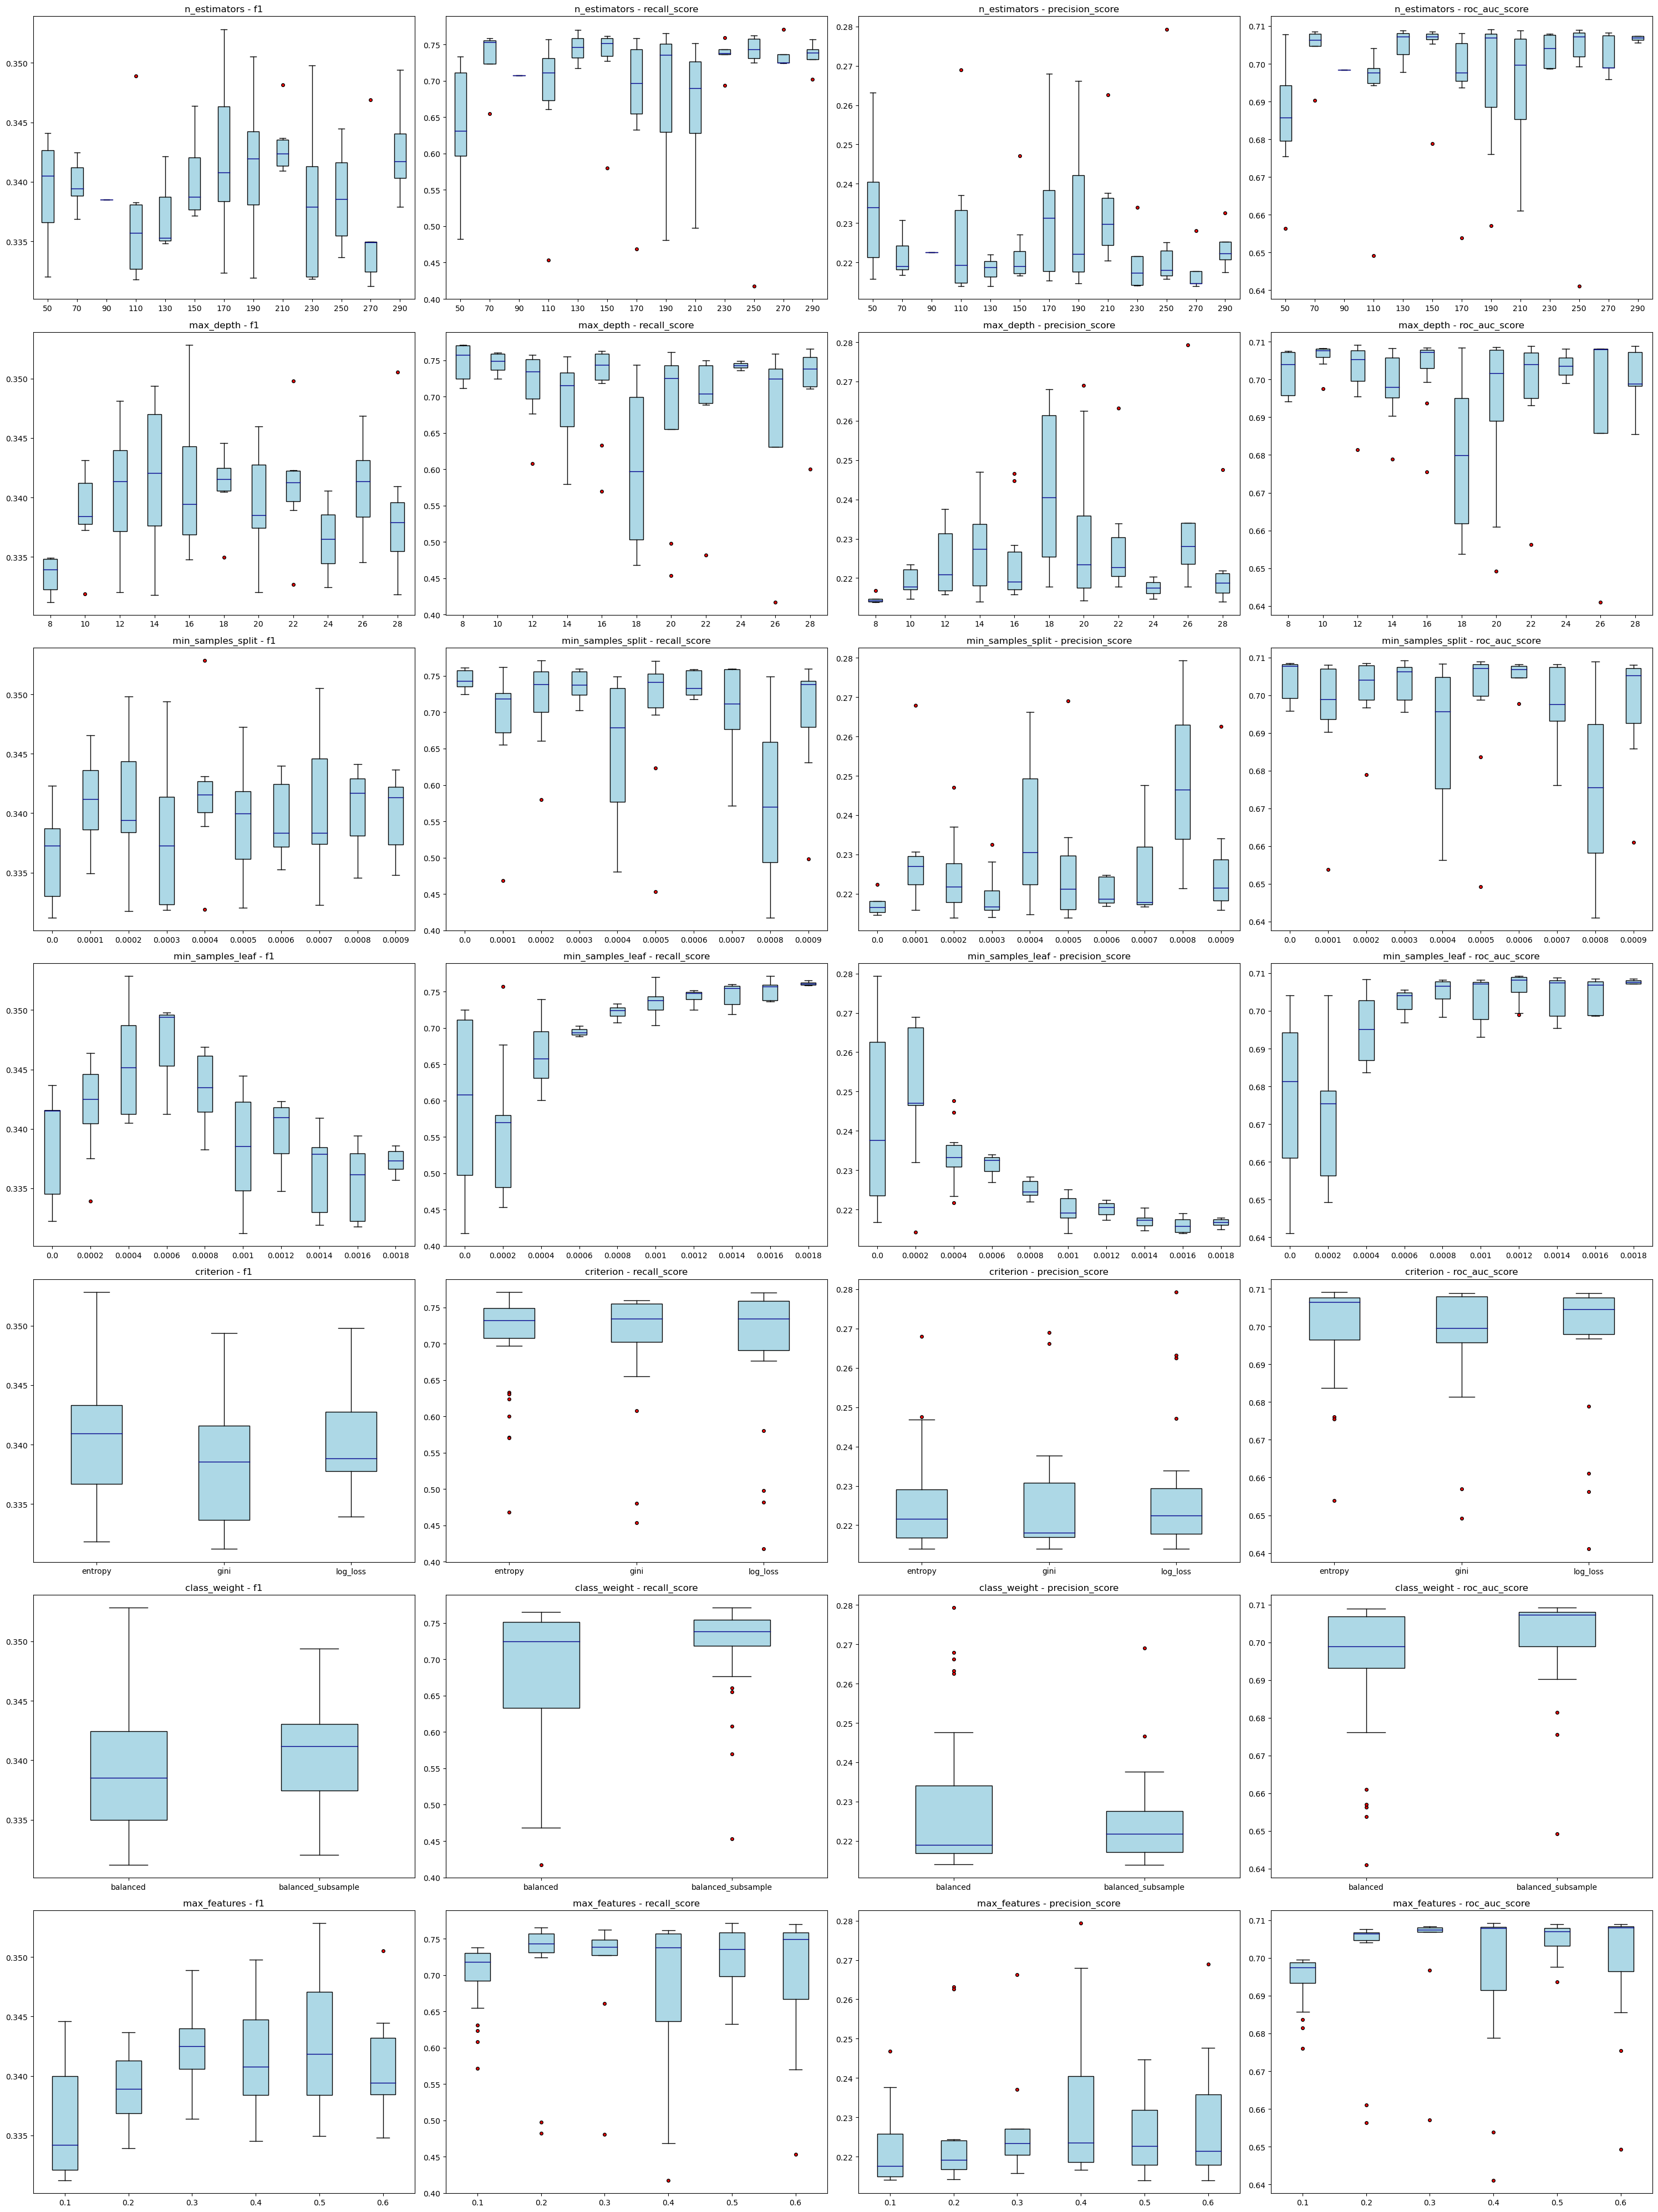

In [74]:
num_best_models = 80

best_models = sorted(result, key = lambda x: -x[1]['f1'][1])[:num_best_models]
fig,ax = plt.subplots(ncols = len(result[0][1]), nrows = len(params), figsize = (30,40))

plot_metrics(result, params, best_models, figsize_param = (30,40))

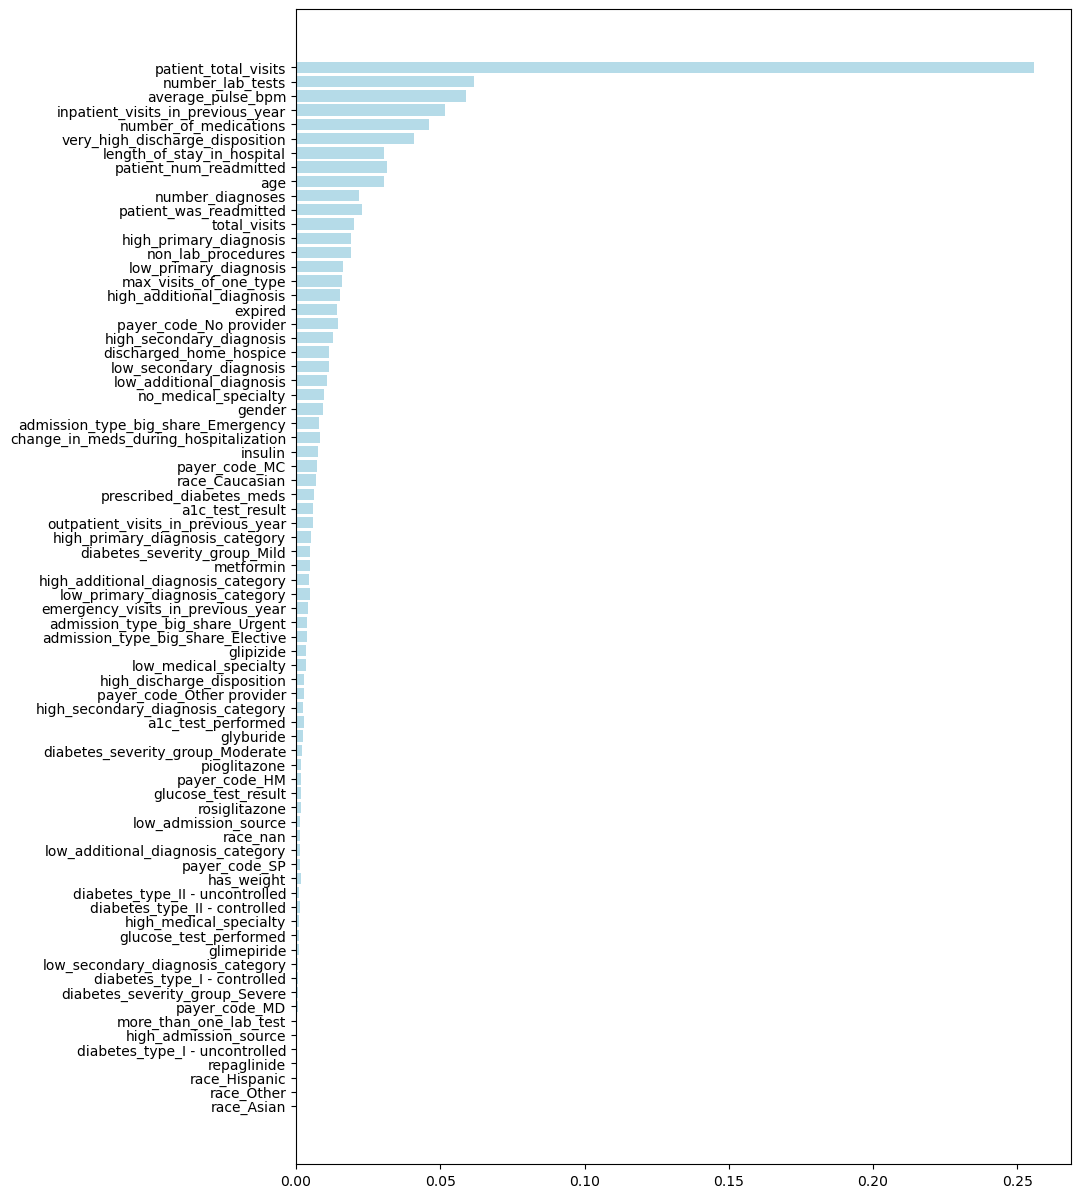

In [75]:
num_best_models = 10

best_models = sorted(result, key = lambda x: -x[1]['f1'][1])[:num_best_models]



fdf = pd.DataFrame(np.array([best_models[k][4] for k in range(len(best_models))]).T)
fdf['features'] = best_models[0][3]
fdf.set_index('features', inplace = True)
ranked_df = fdf.rank(ascending=False)
ranked_df['median_rank'] = ranked_df.median(axis=1)
ranked_df['median_feature_importance'] = fdf.median(axis=1)
ranked_df.reset_index(inplace = True)
ranked_df = ranked_df[['features', 'median_rank', 'median_feature_importance']]
features = ranked_df.sort_values(by = 'median_rank').head(30)['features']


plt.figure(figsize=(10, 15))
plt.barh(ranked_df.sort_values(by = 'median_rank', ascending = False)['features'], 
         ranked_df.sort_values(by = 'median_rank', ascending = False)['median_feature_importance'],
         color='lightblue',  alpha=0.9, linewidth=0, height=0.8, align='center')
         
# plt.tight_layout()
plt.show()

In [85]:
#since we see that all patient level features are important we will not change function of it anyhow
# we will check on n random models what is best amount of features
target = 'readmitted_binary'
    
model = RandomForestClassifier(random_state = random_state)
params = {
    'n_estimators': np.arange(50, 100, 10),
    'max_depth': np.arange(15, 25, 2),
    'min_samples_split': np.arange(0, 0.001, 0.0002) + 0.000001,
    'min_samples_leaf': np.arange(0.0004, 0.0008, 0.0002) + 0.000001,
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_features': np.arange(0.3,0.5,0.1),
}

result_feature_selection = []
for i in tqdm(range(10)):
    random_params = {}
    for key, values in params.items():
        random_params[key] = random.choice(values)
        
    for j in tqdm(range(0,80, 10)):

        features_for_scaling_minmax = list(set(features_for_scaling_minmax).intersection(list(ranked_df.sort_values(by = 'median_rank')[:len(ranked_df)- j]['features'])))
        features_for_scaling_standard = list(set(features_for_scaling_standard).intersection(list(ranked_df.sort_values(by = 'median_rank')[:len(ranked_df)- j]['features'])))

        columns_to_use_full = list(set(columns_to_use).intersection(list(ranked_df.sort_values(by = 'median_rank')[:len(ranked_df)- j]['features'])))
        columns_to_use_full.extend(['patient_id', 'encounter_id'])
                                   
        X_train = df_train[columns_to_use_full]
        y_train = df_train[target]
        X_test = df_test[columns_to_use_full]

        data = pd.concat([X_train, y_train], axis = 1)
    
        result_feature_selection.append(
            (
                len(ranked_df)- j,
             cross_validation(data, 
                     target, 
                     model, 
                     random_params,
                                   
                     scaling = True,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,
                              
                     upsample = False,   
                     cv=5)[1]
            )
        )

 12%|█████▋                                       | 1/8 [00:33<03:54, 33.47s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.415, F1_val: 0.350



 25%|███████████▎                                 | 2/8 [01:05<03:15, 32.52s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.414, F1_val: 0.351



 38%|████████████████▉                            | 3/8 [01:35<02:36, 31.30s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.414, F1_val: 0.350



 50%|██████████████████████▌                      | 4/8 [02:02<01:59, 29.76s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.412, F1_val: 0.350



 62%|████████████████████████████▏                | 5/8 [02:27<01:23, 27.86s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.409, F1_val: 0.348



 75%|█████████████████████████████████▊           | 6/8 [02:46<00:50, 25.16s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.401, F1_val: 0.348



 88%|███████████████████████████████████████▍     | 7/8 [03:02<00:22, 22.15s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.389, F1_val: 0.338



 10%|████▎                                      | 1/10 [03:12<28:55, 192.85s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.353, F1_val: 0.331



 12%|█████▋                                       | 1/8 [00:22<02:40, 22.88s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.467, F1_val: 0.350



 25%|███████████▎                                 | 2/8 [00:44<02:12, 22.08s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.469, F1_val: 0.350



 38%|████████████████▉                            | 3/8 [01:04<01:45, 21.13s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.468, F1_val: 0.351



 50%|██████████████████████▌                      | 4/8 [01:22<01:20, 20.10s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.467, F1_val: 0.350



 62%|████████████████████████████▏                | 5/8 [01:39<00:56, 18.79s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.460, F1_val: 0.350



 75%|█████████████████████████████████▊           | 6/8 [01:52<00:34, 17.00s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.446, F1_val: 0.348



 88%|███████████████████████████████████████▍     | 7/8 [02:03<00:15, 15.01s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.427, F1_val: 0.340



 20%|████████▌                                  | 2/10 [05:23<20:51, 156.40s/it]

RandomForestClassifier(class_weight='balanced', max_depth=21, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.368, F1_val: 0.330



 12%|█████▋                                       | 1/8 [00:27<03:10, 27.19s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.462, F1_val: 0.350



 25%|███████████▎                                 | 2/8 [00:52<02:36, 26.02s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.462, F1_val: 0.348



 38%|████████████████▉                            | 3/8 [01:16<02:04, 24.96s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.464, F1_val: 0.349



 50%|██████████████████████▌                      | 4/8 [01:37<01:34, 23.71s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.462, F1_val: 0.349



 62%|████████████████████████████▏                | 5/8 [01:57<01:06, 22.19s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.457, F1_val: 0.351



 75%|█████████████████████████████████▊           | 6/8 [02:13<00:40, 20.07s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.445, F1_val: 0.349



 88%|███████████████████████████████████████▍     | 7/8 [02:25<00:17, 17.63s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.424, F1_val: 0.340



 30%|████████████▉                              | 3/10 [07:57<18:06, 155.15s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.00040100000000000004,
                       n_estimators=60, random_state=42)
F1 train: 0.366, F1_val: 0.331



 12%|█████▋                                       | 1/8 [00:23<02:46, 23.86s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.462, F1_val: 0.349



 25%|███████████▎                                 | 2/8 [00:46<02:18, 23.13s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.463, F1_val: 0.347



 38%|████████████████▉                            | 3/8 [01:07<01:51, 22.23s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.464, F1_val: 0.351



 50%|██████████████████████▌                      | 4/8 [01:28<01:27, 21.78s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.462, F1_val: 0.351



 62%|████████████████████████████▏                | 5/8 [01:47<01:01, 20.63s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.457, F1_val: 0.351



 75%|█████████████████████████████████▊           | 6/8 [02:02<00:37, 18.83s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.444, F1_val: 0.348



 88%|███████████████████████████████████████▍     | 7/8 [02:15<00:16, 16.71s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.423, F1_val: 0.340



 40%|█████████████████▏                         | 4/10 [10:20<15:02, 150.41s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=17,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.365, F1_val: 0.331



 12%|█████▋                                       | 1/8 [00:38<04:28, 38.31s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.451, F1_val: 0.350



 25%|███████████▎                                 | 2/8 [01:13<03:39, 36.59s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.453, F1_val: 0.348



 38%|████████████████▉                            | 3/8 [01:47<02:55, 35.11s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.456, F1_val: 0.350



 50%|██████████████████████▌                      | 4/8 [02:18<02:14, 33.55s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.454, F1_val: 0.351



 62%|████████████████████████████▏                | 5/8 [02:45<01:34, 31.38s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.452, F1_val: 0.349



 75%|█████████████████████████████████▊           | 6/8 [03:08<00:56, 28.44s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.437, F1_val: 0.350



 88%|███████████████████████████████████████▍     | 7/8 [03:26<00:25, 25.12s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.418, F1_val: 0.340



 50%|█████████████████████▌                     | 5/10 [13:59<14:35, 175.00s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       max_features=0.4,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.363, F1_val: 0.332



 12%|█████▋                                       | 1/8 [00:18<02:12, 18.94s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.453, F1_val: 0.350



 25%|███████████▎                                 | 2/8 [00:36<01:49, 18.27s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.454, F1_val: 0.350



 38%|████████████████▉                            | 3/8 [00:53<01:27, 17.51s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.455, F1_val: 0.350



 50%|██████████████████████▌                      | 4/8 [01:08<01:06, 16.64s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.454, F1_val: 0.349



 62%|████████████████████████████▏                | 5/8 [01:22<00:46, 15.62s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.449, F1_val: 0.350



 75%|█████████████████████████████████▊           | 6/8 [01:33<00:28, 14.19s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.436, F1_val: 0.349



 88%|███████████████████████████████████████▍     | 7/8 [01:43<00:12, 12.63s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.415, F1_val: 0.338



 60%|█████████████████████████▊                 | 6/10 [15:48<10:10, 152.62s/it]

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.363, F1_val: 0.330



 12%|█████▋                                       | 1/8 [00:28<03:18, 28.35s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.414, F1_val: 0.349



 25%|███████████▎                                 | 2/8 [00:54<02:43, 27.32s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.414, F1_val: 0.349



 38%|████████████████▉                            | 3/8 [01:19<02:10, 26.06s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.415, F1_val: 0.350



 50%|██████████████████████▌                      | 4/8 [01:42<01:38, 24.70s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.413, F1_val: 0.349



 62%|████████████████████████████▏                | 5/8 [02:02<01:09, 23.16s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.409, F1_val: 0.348



 75%|█████████████████████████████████▊           | 6/8 [02:19<00:42, 21.02s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.401, F1_val: 0.346



 88%|███████████████████████████████████████▍     | 7/8 [02:33<00:18, 18.64s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.389, F1_val: 0.339



 70%|██████████████████████████████             | 7/10 [18:30<07:47, 155.80s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=60,
                       random_state=42)
F1 train: 0.352, F1_val: 0.330



 12%|█████▋                                       | 1/8 [00:36<04:18, 36.94s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.415, F1_val: 0.349



 25%|███████████▎                                 | 2/8 [01:12<03:35, 36.00s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.415, F1_val: 0.349



 38%|████████████████▉                            | 3/8 [01:44<02:52, 34.41s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.415, F1_val: 0.350



 50%|██████████████████████▌                      | 4/8 [02:14<02:10, 32.65s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.412, F1_val: 0.350



 62%|████████████████████████████▏                | 5/8 [02:41<01:31, 30.55s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.409, F1_val: 0.349



 75%|█████████████████████████████████▊           | 6/8 [03:03<00:55, 27.76s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.400, F1_val: 0.348



 88%|███████████████████████████████████████▍     | 7/8 [03:22<00:24, 24.66s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.390, F1_val: 0.338



 80%|██████████████████████████████████▍        | 8/10 [22:04<05:48, 174.40s/it]

RandomForestClassifier(class_weight='balanced_subsample', max_depth=21,
                       max_features=0.4, min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0008010000000000001, n_estimators=80,
                       random_state=42)
F1 train: 0.352, F1_val: 0.330



 12%|█████▋                                       | 1/8 [00:21<02:32, 21.73s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.409, F1_val: 0.349



 25%|███████████▎                                 | 2/8 [00:42<02:05, 20.88s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.410, F1_val: 0.348



 38%|████████████████▉                            | 3/8 [01:00<01:39, 19.94s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.409, F1_val: 0.347



 50%|██████████████████████▌                      | 4/8 [01:18<01:15, 18.90s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.408, F1_val: 0.347



 62%|████████████████████████████▏                | 5/8 [01:33<00:53, 17.67s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.406, F1_val: 0.347



 75%|█████████████████████████████████▊           | 6/8 [01:46<00:31, 15.98s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.399, F1_val: 0.347



 88%|███████████████████████████████████████▍     | 7/8 [01:56<00:14, 14.02s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.385, F1_val: 0.339



 90%|██████████████████████████████████████▋    | 9/10 [24:07<02:38, 158.16s/it]

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.4,
                       min_samples_leaf=0.0006010000000000001,
                       min_samples_split=0.0006010000000000001, n_estimators=50,
                       random_state=42)
F1 train: 0.350, F1_val: 0.330



 12%|█████▋                                       | 1/8 [00:22<02:40, 22.91s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.461, F1_val: 0.351



 25%|███████████▎                                 | 2/8 [00:44<02:11, 21.96s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.461, F1_val: 0.350



 38%|████████████████▉                            | 3/8 [01:04<01:44, 20.99s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.458, F1_val: 0.350



 50%|██████████████████████▌                      | 4/8 [01:22<01:19, 19.91s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.456, F1_val: 0.351



 62%|████████████████████████████▏                | 5/8 [01:39<00:56, 18.78s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.450, F1_val: 0.350



 75%|█████████████████████████████████▊           | 6/8 [01:52<00:34, 17.08s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.437, F1_val: 0.349



 88%|███████████████████████████████████████▍     | 7/8 [02:04<00:15, 15.23s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.419, F1_val: 0.341



100%|██████████████████████████████████████████| 10/10 [26:18<00:00, 157.90s/it]

RandomForestClassifier(class_weight='balanced', max_depth=23, max_features=0.3,
                       min_samples_leaf=0.00040100000000000004,
                       min_samples_split=0.000201, n_estimators=60,
                       random_state=42)
F1 train: 0.366, F1_val: 0.329


In [ ]:
import pickle


# Store the list using pickle
with open('Learning_results/rf_feature_selection_num_features.pkl', 'wb') as file:
    pickle.dump(result_feature_selection, file)

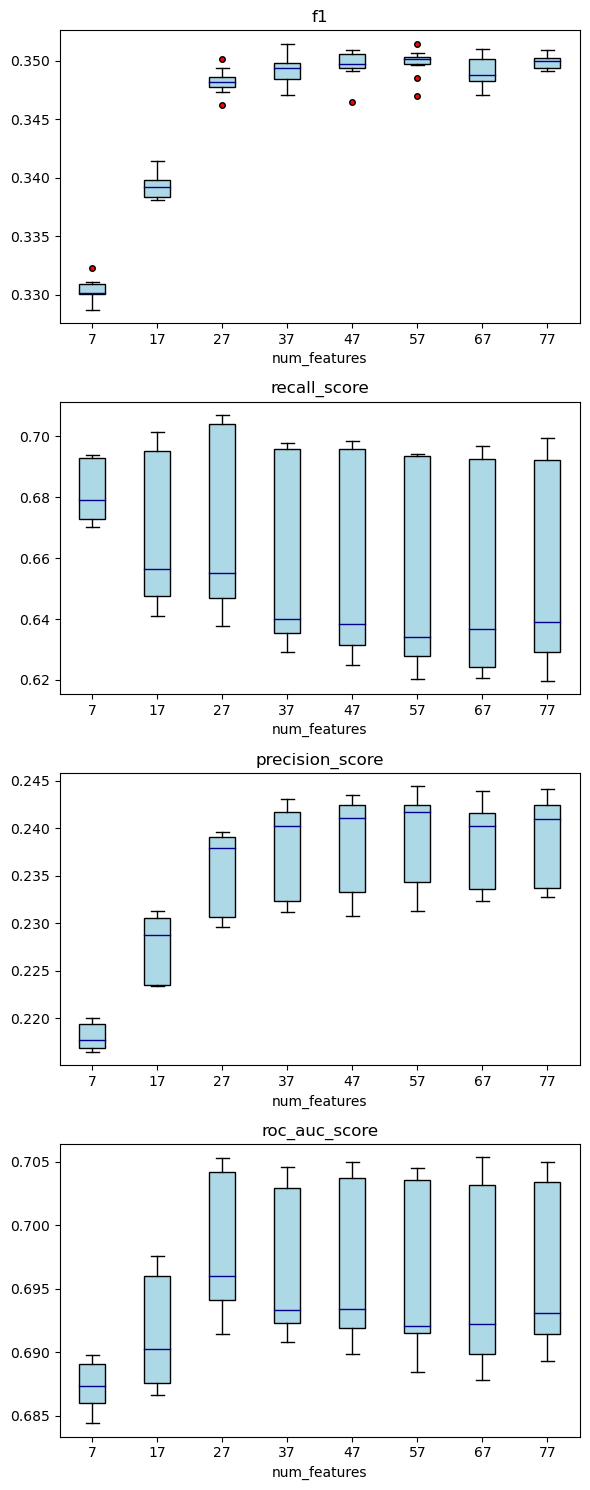

In [86]:
result_feature_selection_df = pd.DataFrame(result_feature_selection)

result_feature_selection_df[list(result_feature_selection_df[1][0].keys())] = pd.DataFrame(result_feature_selection_df[1].apply(lambda x: [x[i][1] for i in x.keys()]).apply(pd.Series)
)

result_feature_selection_df.rename(columns={0: 'num_features'}, inplace=True)
fig,ax = plt.subplots( nrows = len(list(result_feature_selection_df[1][0].keys())), figsize = (6,15))
result_feature_selection_df = result_feature_selection_df.sort_values(by='num_features')

for m in range(len(list(result_feature_selection_df[1][0].keys()))):
    metric = list(result_feature_selection_df[1][0].keys())[m]
    # ax[m].plot(result_feature_selection_df[ [metric,'num_features'] ].groupby(by = ['num_features']).max())
    # ax[m].plot(result_feature_selection_df[ [metric,'num_features'] ].groupby(by = ['num_features']).min())
    # ax[m].plot(result_feature_selection_df[ [metric,'num_features'] ].groupby(by = ['num_features']).median())

    ax[m].boxplot([group[1][metric].values for group in result_feature_selection_df.groupby('num_features')],
            labels = result_feature_selection_df['num_features'].unique()+3,
            patch_artist=True,
            widths=0.4,         
            medianprops=dict(color='darkblue'),
            boxprops=dict(facecolor='lightblue', edgecolor='black'),
             whiskerprops=dict(color='black'), 
             capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=4) )
                       
    ax[m].set_title(metric)
    ax[m].set_xlabel('num_features')

plt.tight_layout()
plt.show()

In [213]:
#We gonna go for 40 best features according to plot, since this amount tends to give more stable results
# Redefine data with new selected columns
features =  list(set(list(ranked_df.sort_values(by = 'median_rank').head(40)['features'])).intersection(set(columns_to_use)))
features.extend(['encounter_id', 'patient_id'])
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]

features_for_scaling_minmax = list(set(features_for_scaling_minmax).intersection(set(features)))
features_for_scaling_standard = list(set(features_for_scaling_standard).intersection(set(features)))

data = pd.concat([X_train, y_train], axis = 1)

target = 'readmitted_binary'

#### Logreg Lasso Coef

In [162]:
features_for_scaling_minmax = ['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'total_visits',
       'max_visits_of_one_type', 'average_pulse_bpm','length_of_stay_in_hospital',
       'non_lab_procedures', 'number_diagnoses', 'glucose_test_result','a1c_test_result'
                              ]
features_for_scaling_standard = ['number_lab_tests', 'number_of_medications']

columns_to_use_full = columns_to_use #+ features_for_encoding

X_train = df_train[columns_to_use_full]
y_train = df_train[target]
X_test = df_test[columns_to_use_full]

data = pd.concat([X_train, y_train], axis = 1)

target = 'readmitted_binary'

In [164]:
model = LogisticRegression(solver='saga', max_iter = 200, 
                           class_weight = 'balanced', random_state = random_state )
params = {
    'penalty': 'l1',
    'max_iter': 1000
}

result_log_reg = []
result_log_reg.append(cross_validation(data, 
                 target, 
                 model, 
                 params,                
                 scaling = True,
                 features_for_scaling_minmax = features_for_scaling_minmax,
                 features_for_scaling_standard = features_for_scaling_standard,
                 cv=5))

/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.315, F1_val: 0.316


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


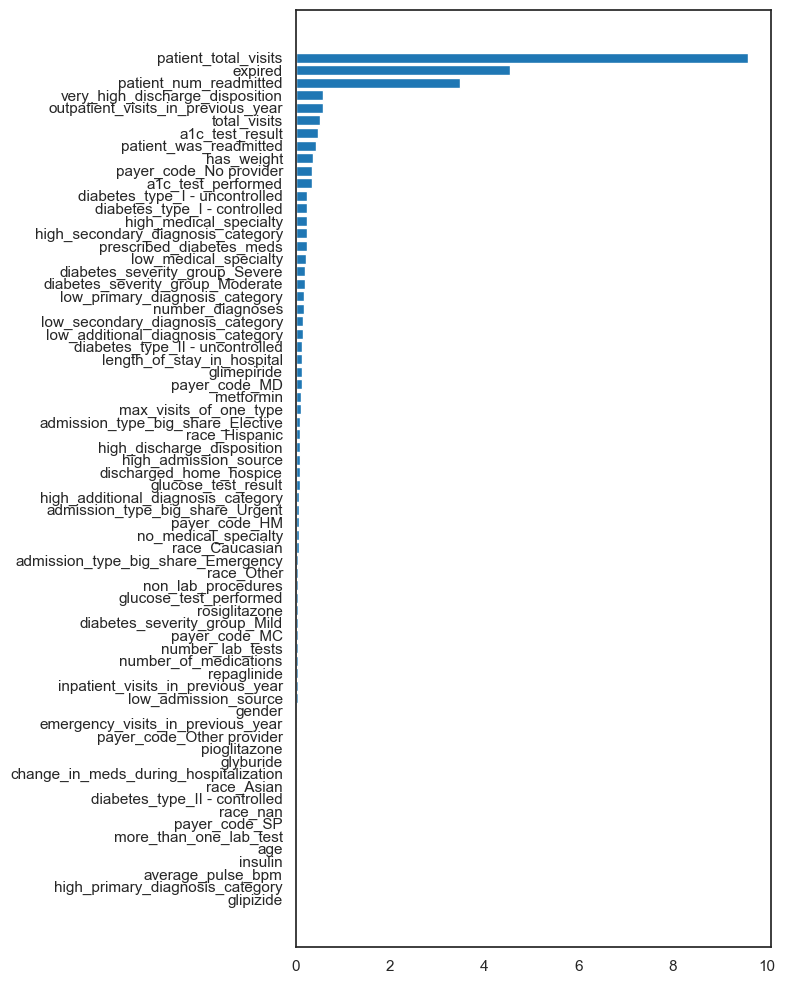

In [167]:

fdf = pd.DataFrame(np.abs(result_log_reg[0][-1][0]), columns = ['coef'])
fdf['features'] = result_log_reg[0][3]
fdf.set_index('features', inplace = True)
fdf['rank'] = fdf.rank(ascending=False)
fdf.reset_index(inplace = True)

plt.figure(figsize=(8, 10))
plt.barh(fdf.sort_values(by = 'rank', ascending = False)['features'], fdf.sort_values(by = 'rank', ascending = False)['coef'])
plt.tight_layout()
plt.show()

In [180]:
model = LogisticRegression(solver='saga', max_iter = 200, 
                           class_weight = 'balanced', random_state = random_state )
params = {
    'penalty': 'l1',
    'max_iter': 1000
}
result_feature_selection = []

for j in tqdm(range(40,70, 3)):

    features_for_scaling_minmax = list(set(features_for_scaling_minmax).intersection(list(ranked_df.sort_values(by = 'median_rank')[:len(ranked_df)- j]['features'])))
    features_for_scaling_standard = list(set(features_for_scaling_standard).intersection(list(ranked_df.sort_values(by = 'median_rank')[:len(ranked_df)- j]['features'])))

    columns_to_use_full = list(set(columns_to_use).intersection(list(ranked_df.sort_values(by = 'median_rank')[:len(ranked_df)- j]['features'])))
    columns_to_use_full.extend(['patient_id', 'encounter_id'])
                               
    X_train = df_train[columns_to_use_full]
    y_train = df_train[target]
    X_test = df_test[columns_to_use_full]

    data = pd.concat([X_train, y_train], axis = 1)

    result_feature_selection.append(
        (
            len(ranked_df)- j,
         cross_validation(data, 
                 target, 
                 model, 
                 params,
                               
                 scaling = True,
                 features_for_scaling_minmax = features_for_scaling_minmax,
                 features_for_scaling_standard = features_for_scaling_standard,
                          
                 upsample = False,   
                 cv=5)[1]
        )
    )

  0%|                                                    | 0/10 [00:00<?, ?it/s]/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.313, F1_val: 0.317


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 20%|████████▊           

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.314, F1_val: 0.317


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 30%|█████████████▏      

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.314, F1_val: 0.318


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 40%|█████████████████▌  

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.314, F1_val: 0.316


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 50%|████████████████████

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.306, F1_val: 0.311


 60%|██████████████████████████▍                 | 6/10 [04:05<02:07, 31.82s/it]

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.301, F1_val: 0.307


 70%|██████████████████████████████▊             | 7/10 [04:11<01:10, 23.61s/it]

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.302, F1_val: 0.309


 80%|███████████████████████████████████▏        | 8/10 [04:17<00:35, 17.77s/it]

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.304, F1_val: 0.311


 90%|███████████████████████████████████████▌    | 9/10 [04:21<00:13, 13.61s/it]

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.297, F1_val: 0.298


100%|███████████████████████████████████████████| 10/10 [04:22<00:00, 26.29s/it]

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')
F1 train: 0.312, F1_val: 0.313


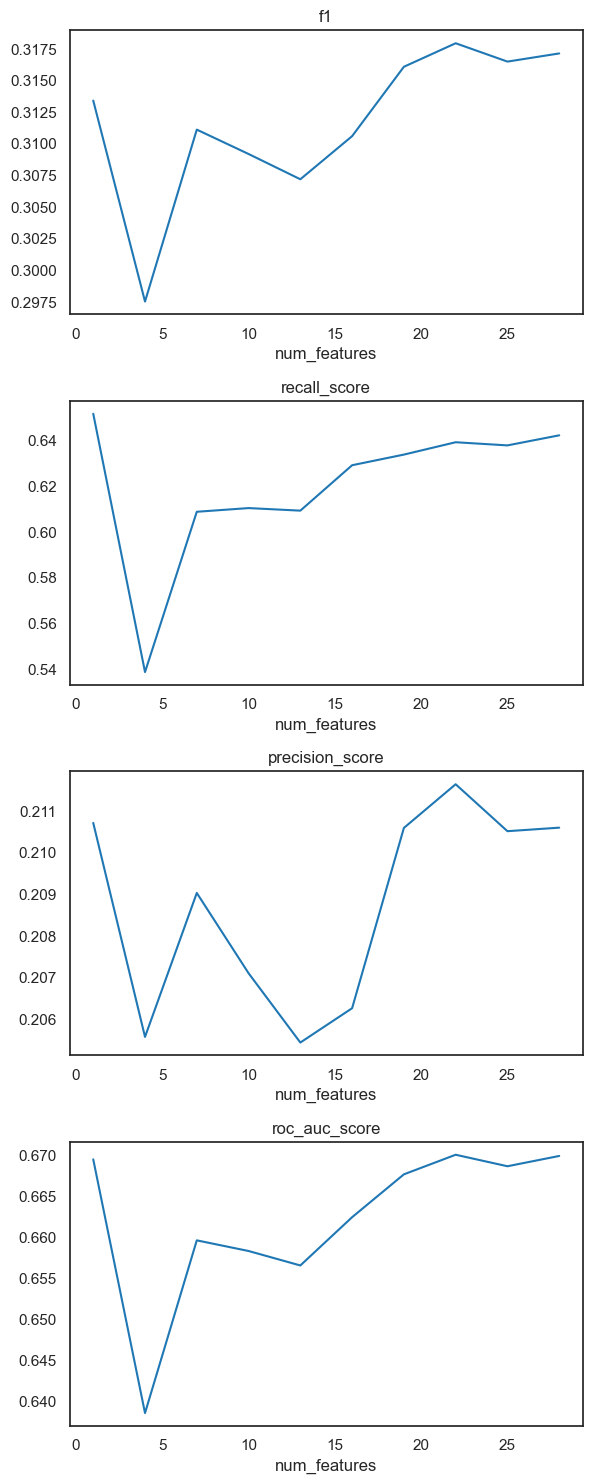

In [181]:
result_feature_selection_df = pd.DataFrame(result_feature_selection)

result_feature_selection_df[list(result_feature_selection_df[1][0].keys())] = pd.DataFrame(result_feature_selection_df[1].apply(lambda x: [x[i][1] for i in x.keys()]).apply(pd.Series)
)

result_feature_selection_df.rename(columns={0: 'num_features'}, inplace=True)
fig,ax = plt.subplots( nrows = len(list(result_feature_selection_df[1][0].keys())), figsize = (6,15))
result_feature_selection_df = result_feature_selection_df.sort_values(by='num_features')

for m in range(len(list(result_feature_selection_df[1][0].keys()))):
    metric = list(result_feature_selection_df[1][0].keys())[m]
    # ax[m].plot(result_feature_selection_df[ [metric,'num_features'] ].groupby(by = ['num_features']).max())
    # ax[m].plot(result_feature_selection_df[ [metric,'num_features'] ].groupby(by = ['num_features']).min())
    ax[m].plot(result_feature_selection_df[ [metric,'num_features'] ].groupby(by = ['num_features']).median())

    # ax[m].boxplot([group[1][metric].values for group in result_feature_selection_df.groupby('num_features')],
    #         labels = result_feature_selection_df['num_features'].unique(),
    #         patch_artist=True,
    #         widths=0.4,         
    #         medianprops=dict(color='darkblue'),
    #         boxprops=dict(facecolor='lightblue', edgecolor='black'),
    #          whiskerprops=dict(color='black'), 
    #          capprops=dict(color='black'),
    #         flierprops=dict(markerfacecolor='red', marker='o', markersize=4) )
                       
    ax[m].set_title(metric)
    ax[m].set_xlabel('num_features')

plt.tight_layout()
plt.show()

### Model selection

#### RF

In [ ]:
#change grid based on knowledge from feature selection

model = RandomForestClassifier(random_state = random_state)
rf_params = {
    'n_estimators': np.arange(150, 200, 10),
    'max_depth': np.arange(10, 30, 2),
    'min_samples_split': np.arange(0.0002, 0.001, 0.0001),
    'min_samples_leaf': np.arange(0.0002, 0.001, 0.0001),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_features': np.arange(0.3,0.9,0.1),
}

rf_result = []
for i in tqdm(range(100)):
    random_params = {}
    for key, values in rf_params.items():
        random_params[key] = random.choice(values)
    rf_result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params,
                     scaling = True,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,    
                     upsample = False,   
                     cv=5))

  1%|▍                                        | 1/100 [00:36<1:00:47, 36.85s/it]

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.3,
                       min_samples_leaf=0.0007000000000000001,
                       min_samples_split=0.0006000000000000001,
                       n_estimators=170, random_state=42)
F1 train: 0.369, F1_val: 0.341


In [ ]:
with open('Learning_results/rf_model_selection.pkl', 'wb') as file:
    pickle.dump(rf_result, file)

In [ ]:
num_best_models = 90

best_models = sorted(rf_result, key = lambda x: -x[1]['f1'][1])[:num_best_models]

plot_metrics(rf_result, rf_params, best_models, figsize_param = (30,40))

In [ ]:
best_rf = sorted(rf_result, key = lambda x: -x[1]['f1'][1])[0]
print('Best Model: {}'.format(RandomForestClassifier(**best_rf[0])))
print('F1: {}'.format(round(best_rf[1]['f1'][1],4)))

#### GB

In [ ]:
model = GradientBoostingClassifier(random_state = random_state)

gb_params = {
    'n_estimators': np.arange(50, 300, 20),
    'max_depth': np.arange(1, 10, 1),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5,1.0,0.1),
    'min_samples_split': np.arange(0, 0.001, 0.0001) + 0.000001,
    'min_samples_leaf': np.arange(0, 0.002, 0.0002) + 0.000001,
    'loss': ['exponential', 'log_loss'],
    'max_features': np.arange(0.1,0.7,0.1),
}

gb_upsample_params = []
gb_result = []
for i in tqdm(range(30)):
    random_params = {}
    for key, values in gb_params.items():
        random_params[key] = random.choice(values)
        
    upsample = random.choice([True,False])
    if upsample == True:
       upsample_type = random.choice(['simple', 'SMOTE'])
    else:
       upsample_type = None
    gb_upsample_params.append([upsample, upsample_type])
    print(upsample, upsample_type)
    gb_result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params, 
                     scaling = False,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,
                     upsample = upsample, 
                     upsample_type = upsample_type,
                     cv=5))
    

In [ ]:
upsample_list = ['upsample', 'upsample_type']

fig,ax = plt.subplots(ncols = len(gb_result[0][1]), nrows = len(upsample_list), figsize = (10,6))
    
for m in range(len(gb_result[0][1])):
    for key in range(len(upsample_list)):
        hyperparam = upsample_list[key]
        metric = list(gb_result[0][1].keys())[m]
        hyperparam_df = pd.DataFrame(list(zip([i[key] for i in gb_upsample_params], [( gb_result[i][1][metric][1]) for i in range(len(gb_result))])),
                                     columns = ['hyperparameter', metric]).fillna('None')
        if hyperparam_df['hyperparameter'].dtype == 'O':
            hyperparam_df['hyperparameter'] = hyperparam_df['hyperparameter'].astype(str)
        hyperparam_df = hyperparam_df.sort_values(by='hyperparameter')
        
        ax[key, m].boxplot([group[1][metric].values for group in hyperparam_df.groupby('hyperparameter')],
        labels = [np.round(i, 4) if isinstance(i, float) else i for i in hyperparam_df['hyperparameter'].unique()],
        patch_artist=True,
        widths=0.4,         
        medianprops=dict(color='darkblue'),
        boxprops=dict(facecolor='lightblue', edgecolor='black'),
         whiskerprops=dict(color='black'), 
         capprops=dict(color='black'),
        flierprops=dict(markerfacecolor='red', marker='o', markersize=4)
                          ) 
        ax[key, m].tick_params(axis='x', labelsize=8)
        ax[key, m].set_title(hyperparam + ' - ' + metric, fontsize=9)

        ax[key, m].xaxis.grid(False)
        ax[key, m].yaxis.grid(False)
plt.tight_layout()
plt.savefig('Images/gradient_boosting_upsample_results.png')
plt.show()

In [ ]:
#simple upsampling is the best approach here

model = GradientBoostingClassifier(random_state = random_state)

gb_params = {
    'n_estimators': np.arange(50, 300, 20),
    'max_depth': np.arange(1, 10, 1),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5,1.0,0.1),
    'min_samples_split': np.arange(0, 0.001, 0.0001) + 0.000001,
    'min_samples_leaf': np.arange(0, 0.002, 0.0002) + 0.000001,
    'loss': ['exponential', 'log_loss'],
    'max_features': np.arange(0.1,0.7,0.1),
}

gb_result = []
for i in tqdm(range(100)):
    random_params = {}
    for key, values in params.items():
        random_params[key] = random.choice(values)
        
    gb_result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params, 
                     scaling = False,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,
                     upsample = True, 
                     upsample_type = 'simple',
                     cv=5))
    

In [ ]:
with open('Learning_results/gb_model_selection.pkl', 'wb') as file:
    pickle.dump(gb_result, file)

In [ ]:
num_best_models = 90

best_models = sorted(gb_result, key = lambda x: -x[1]['f1'][1])[:num_best_models]

plot_metrics(gb_result, gb_params, best_models, figsize_param = (30,40))

In [ ]:
best_gb = sorted(gb_result, key = lambda x: -x[1]['f1'][1])[0]
print('Best Model: {}'.format(GradientBoostingClassifier(**best_gb[0])))
print('F1: {}'.format(round(best_gb[1]['f1'][1],4)))

#### Adaboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(random_state = random_state, estimator = DecisionTreeClassifier())


adaboost_params = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'estimator__max_depth': np.arange(1, 10, 1),  # Adjust based on your base estimator
    'estimator__min_samples_split': np.arange(0.0002, 0.001, 0.0001),  # Adjust based on your base estimator
    'estimator__min_samples_leaf': np.arange(0.0002, 0.001, 0.0001),  # Adjust based on your base estimator
}


adaboost_upsample_params = []
adaboost_result = []
for i in tqdm(range(30)):
    random_params = {}
    for key, values in adaboost_params.items():
        random_params[key] = random.choice(values)
        
    upsample = random.choice([True,False])
    if upsample == True:
       upsample_type = random.choice(['simple', 'SMOTE'])
    else:
       upsample_type = None
    adaboost_upsample_params.append([upsample, upsample_type])
    print(upsample, upsample_type)
    adaboost_result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params, 
                     scaling = False,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,
                     upsample = upsample, 
                     upsample_type = upsample_type,
                     cv=5))
   

In [ ]:
upsample_list = ['upsample', 'upsample_type']

fig,ax = plt.subplots(ncols = len(adaboost_result[0][1]), nrows = len(upsample_list), figsize = (10,6))
    
for m in range(len(adaboost_result[0][1])):
    for key in range(len(upsample_list)):
        hyperparam = upsample_list[key]
        metric = list(adaboost_result[0][1].keys())[m]
        hyperparam_df = pd.DataFrame(list(zip([i[key] for i in adaboost_upsample_params], [( adaboost_result[i][1][metric][1]) for i in range(len(adaboost_result))])),
                                     columns = ['hyperparameter', metric]).fillna('None')
        if hyperparam_df['hyperparameter'].dtype == 'O':
            hyperparam_df['hyperparameter'] = hyperparam_df['hyperparameter'].astype(str)
        hyperparam_df = hyperparam_df.sort_values(by='hyperparameter')
        
        ax[key, m].boxplot([group[1][metric].values for group in hyperparam_df.groupby('hyperparameter')],
        labels = [np.round(i, 4) if isinstance(i, float) else i for i in hyperparam_df['hyperparameter'].unique()],
        patch_artist=True,
        widths=0.4,         
        medianprops=dict(color='darkblue'),
        boxprops=dict(facecolor='lightblue', edgecolor='black'),
         whiskerprops=dict(color='black'), 
         capprops=dict(color='black'),
        flierprops=dict(markerfacecolor='red', marker='o', markersize=4)
                          ) 
        ax[key, m].tick_params(axis='x', labelsize=8)
        ax[key, m].set_title(hyperparam + ' - ' + metric, fontsize=9)

        ax[key, m].xaxis.grid(False)
        ax[key, m].yaxis.grid(False)
plt.tight_layout()
plt.savefig('Images/adaboost_upsample_results.png')
plt.show()

In [ ]:
#simple upsampling is the best approach here

model = AdaBoostClassifier(random_state = random_state, estimator = DecisionTreeClassifier())


adaboost_params = {
    'n_estimators': np.arange(10, 100, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'estimator__max_depth': np.arange(1, 5, 1),  # Adjust based on your base estimator
    'estimator__min_samples_split': np.arange(0.0001, 0.001, 0.0001),  # Adjust based on your base estimator
    'estimator__min_samples_leaf': np.arange(0.0001, 0.001, 0.0001),  # Adjust based on your base estimator
}


adaboost_result = []
for i in tqdm(range(100)):
    random_params = {}
    for key, values in adaboost_params.items():
        random_params[key] = random.choice(values)
        
    adaboost_result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params, 
                     scaling = False,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,
                     upsample = True, 
                     upsample_type = 'simple',
                     cv=5))

In [ ]:
with open('Learning_results/adaboost_model_selection.pkl', 'wb') as file:
    pickle.dump(adaboost_result, file)

In [ ]:
num_best_models = 90

best_models = sorted(adaboost_result, key = lambda x: -x[1]['f1'][1])[:num_best_models]

plot_metrics(adaboost_result, adaboost_params, best_models, figsize_param = (30,40))

In [ ]:
best_adaboost = sorted(adaboost_result, key = lambda x: -x[1]['f1'][1])[0]
print('Best Model: {}'.format(best_adaboost[0]))
print('F1: {}'.format(round(best_adaboost[1]['f1'][1],4)))

#### SVC

#### Gaussian NB

#### MLP Classifier

In [165]:
model = MLPClassifier(verbose = False)

params = {
    'hidden_layer_sizes': [(50, 50), (100,), (30,30)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [50]
}

mlp_upsample_params = []
mlp_result = []
for i in tqdm(range(30)):
    random_params = {}
    for key, values in params.items():
        random_params[key] = random.choice(values)
        
    upsample = random.choice([True,False])
    if upsample == True:
       upsample_type = random.choice(['simple', 'SMOTE'])
    else:
       upsample_type = None
    mlp_upsample_params.append([upsample, upsample_type])
    print(upsample, upsample_type)
    mlp_result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params, 
                     scaling = True,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,
                     upsample = upsample, 
                     upsample_type = upsample_type,
                     cv=5))

  0%|                                                     | 0/5 [00:00<?, ?it/s]

True simple


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/a

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(50, 50),
              learning_rate='adaptive', max_iter=50, solver='sgd')
F1 train: 0.657, F1_val: 0.307
True simple


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 40%|██████████████████                           | 2/5 [01:00<01:22, 27.54s/it]

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50),
              learning_rate='invscaling', max_iter=50, solver='sgd')
F1 train: 0.560, F1_val: 0.220
True SMOTE


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/a

MLPClassifier(alpha=0.001, hidden_layer_sizes=(30, 30),
              learning_rate='invscaling', max_iter=50)
F1 train: 0.878, F1_val: 0.154
True SMOTE


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/a

MLPClassifier(max_iter=50, solver='sgd')
F1 train: 0.851, F1_val: 0.228
True SMOTE


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/a

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 30),
              learning_rate='adaptive', max_iter=50, solver='sgd')
F1 train: 0.824, F1_val: 0.233


ValueError: Dimensions of labels and X must be compatible

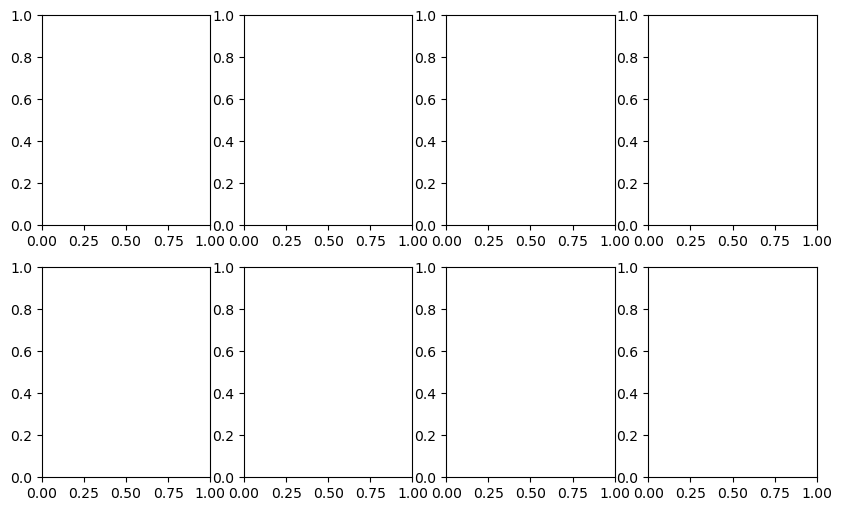

In [169]:
upsample_list = ['upsample', 'upsample_type']

fig,ax = plt.subplots(ncols = len(mlp_result[0][1]), nrows = len(upsample_list), figsize = (10,6))
    
for m in range(len(mlp_result[0][1])):
    for key in range(len(upsample_list)):
        hyperparam = upsample_list[key]
        metric = list(mlp_result[0][1].keys())[m]
        hyperparam_df = pd.DataFrame(list(zip([i[key] for i in mlp_upsample_params], [( mlp_result[i][1][metric][1]) for i in range(len(mlp_result))])),
                                     columns = ['hyperparameter', metric]).fillna('None')
        if hyperparam_df['hyperparameter'].dtype == 'O':
            hyperparam_df['hyperparameter'] = hyperparam_df['hyperparameter'].astype(str)
        hyperparam_df = hyperparam_df.sort_values(by='hyperparameter')
        
        ax[key, m].boxplot([group[1][metric].values for group in hyperparam_df.groupby('hyperparameter')],
        labels = [np.round(i, 4) if isinstance(i, float) else i for i in hyperparam_df['hyperparameter'].unique()],
        patch_artist=True,
        widths=0.4,         
        medianprops=dict(color='darkblue'),
        boxprops=dict(facecolor='lightblue', edgecolor='black'),
         whiskerprops=dict(color='black'), 
         capprops=dict(color='black'),
        flierprops=dict(markerfacecolor='red', marker='o', markersize=4)
                          ) 
        ax[key, m].tick_params(axis='x', labelsize=10)
        ax[key, m].set_title(hyperparam + ' - ' + metric, fontsize=10)

        ax[key, m].xaxis.grid(False)
        ax[key, m].yaxis.grid(False)
plt.tight_layout()
plt.show()
plt.savefig('Images/mlp_upsample_results.png')

In [168]:
## Rerun with simple upsampling

model = MLPClassifier(verbose = False)

params = {
    'hidden_layer_sizes': [(50, 50), (100,), (30,30), (80,80), (30,30,30)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 400]
}

mlp_upsample_params = []
mlp_result = []
for i in tqdm(range(5)):
    random_params = {}
    for key, values in params.items():
        random_params[key] = random.choice(values)

    mlp_result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params, 
                     scaling = True,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,
                     upsample = True, 
                     upsample_type = 'simple',
                     cv=5))

  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

MLPClassifier(hidden_layer_sizes=(80, 80), learning_rate='adaptive',
              max_iter=100, solver='sgd')
F1 train: 0.652, F1_val: 0.283


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 40%|██████████████████                           | 2/5 [02:08<02:44, 54.92s/it]

MLPClassifier(alpha=0.001, hidden_layer_sizes=(30, 30),
              learning_rate='invscaling', max_iter=100, solver='sgd')
F1 train: 0.584, F1_val: 0.247


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

MLPClassifier(activation='tanh', alpha=0.01, max_iter=100)
F1 train: 0.754, F1_val: 0.299


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(50, 50),
              learning_rate='invscaling', max_iter=100)
F1 train: 0.717, F1_val: 0.309


/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/antonkutsenko/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

MLPClassifier(activation='tanh', hidden_layer_sizes=(80, 80), max_iter=100)
F1 train: 0.830, F1_val: 0.285


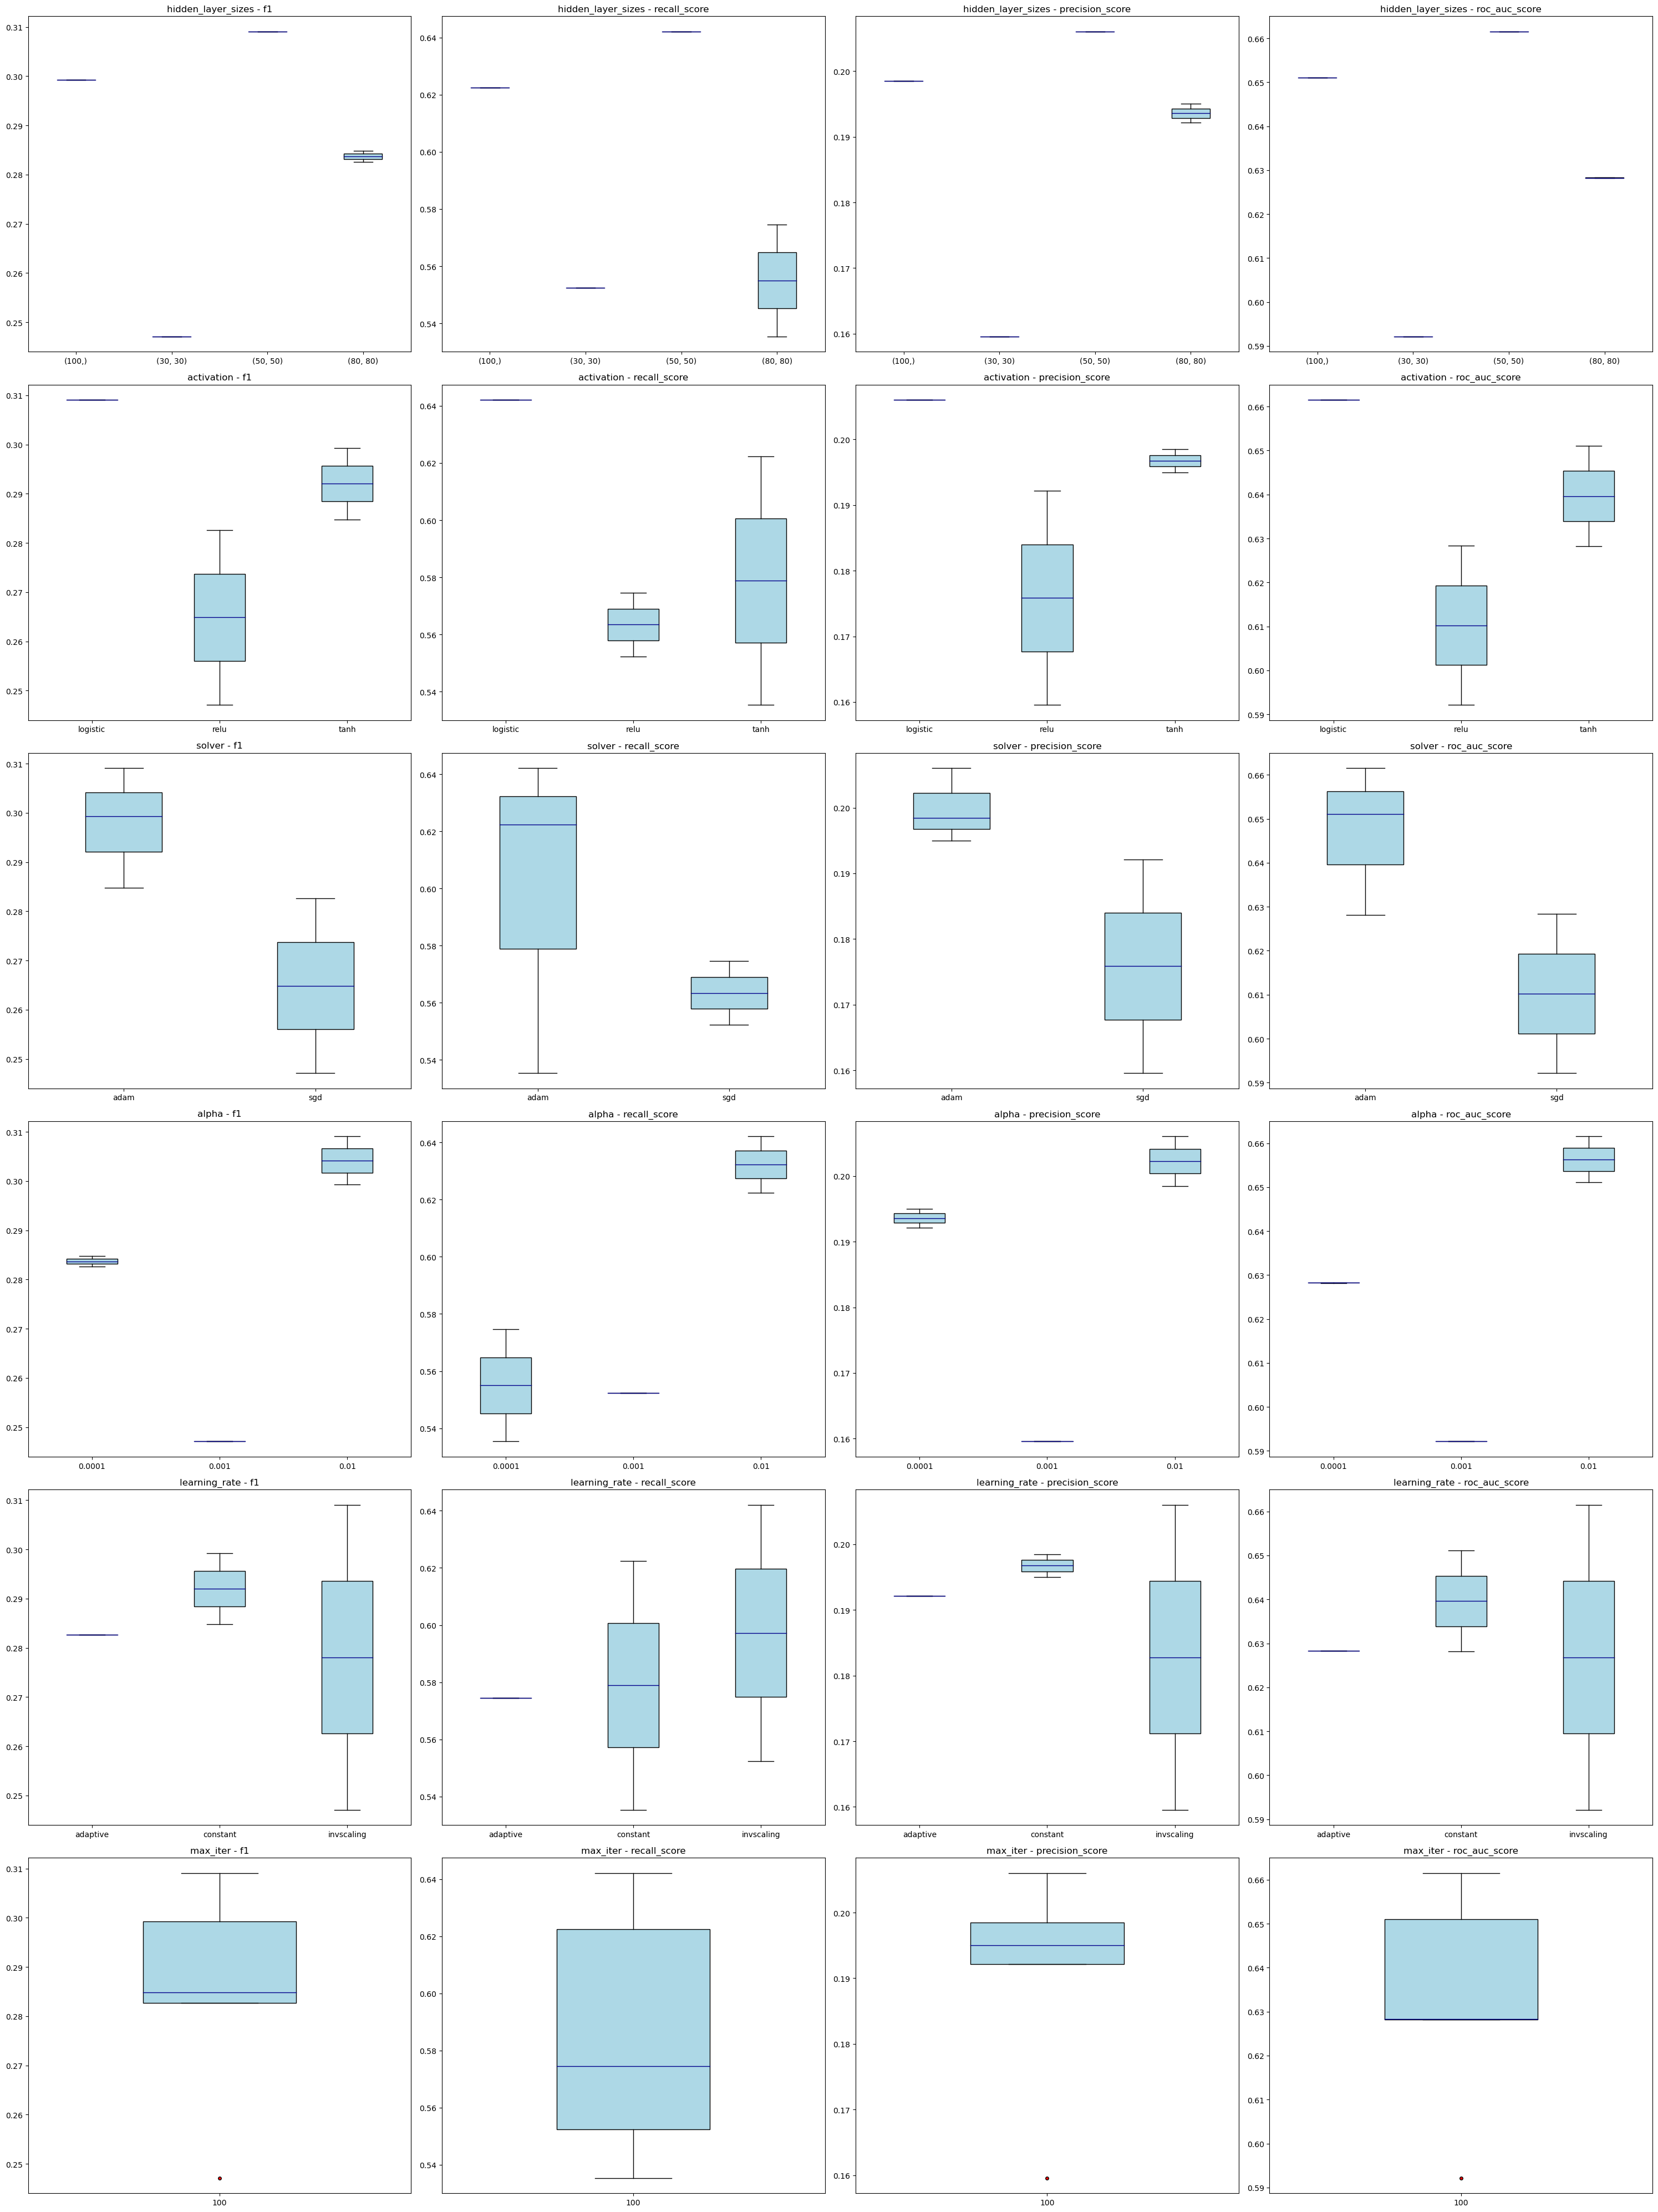

In [172]:
num_best_models = 50

best_models = sorted(mlp_result, key = lambda x: -x[1]['f1'][1])[:num_best_models]
# fig,ax = plt.subplots(ncols = len(result[0][1]), nrows = len(params), figsize = (30,40))

plot_metrics(mlp_result, params, best_models, figsize_param = (30,40))

#### Logistic Regression

In [ ]:
model = LogisticRegression(solver='saga', max_iter = 400, 
                           class_weight = 'balanced', random_state = random_state )
params = {
    'penalty': ['l1', 'l2'],         # Regularization type
    'C': [ 0.01, 0.1, 1],  # Inverse of regularization strength
    'max_iter': np.arange(100,1000,100)
}

result = []
for i in range(5):
    random_params = {}
    for key, values in params.items():
        random_params[key] = random.choice(values)
    result.append(cross_validation(data, 
                     target, 
                     model, 
                     random_params, 
                                   
                     scaling = True,
                     features_for_scaling_minmax = features_for_scaling_minmax,
                     features_for_scaling_standard = features_for_scaling_standard,

                     target_encoding = True,
                     features_for_encoding = features_for_encoding,
                                   
                     upsample = False, 
                     cv=5))

#### Stacked Classifier

In [ ]:
>>> estimators = [
...     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
...     ('svr', make_pipeline(StandardScaler(),
...                           LinearSVC(dual="auto", random_state=42)))
... ]
>>> clf = StackingClassifier(
...     estimators=estimators, final_estimator=LogisticRegression()
... )
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, stratify=y, random_state=42
... )
>>> clf.fit(X_train, y_train).score(X_test, y_test)

### Submissions

In [ ]:
### Submit_v6

columns_to_use = ['encounter_id', 'patient_id', 
                  
                  'gender', 'age', 
                  'has_weight',
                  
                  
                  'outpatient_visits_in_previous_year',
                  'emergency_visits_in_previous_year',
                  'inpatient_visits_in_previous_year', 
                  'total_visits', 
                  'max_visits_of_one_type',
                  
                  'average_pulse_bpm', 
                  'length_of_stay_in_hospital', 
                  
                  'number_lab_tests', 'more_than_one_lab_test',
                  'non_lab_procedures', 
                  'number_of_medications', 
                  'number_diagnoses',
                  
                  'glucose_test_result', 'glucose_test_performed', 
                  'a1c_test_result','a1c_test_performed',
                  
                  'change_in_meds_during_hospitalization', 
                  'prescribed_diabetes_meds', 
                  
                  'race_Asian', 'race_Caucasian', 'race_Hispanic',
                  'race_Other', 'race_nan', 
                  
                  'payer_code_HM', 'payer_code_MC',
                  'payer_code_MD', 'payer_code_No provider', 'payer_code_Other provider',
                  'payer_code_SP', 
                  
                  'high_admission_source', 
                  # 'medium_admission_source', 
                  'low_admission_source',
                  
                  'admission_type_big_share_Elective', 'admission_type_big_share_Emergency', 'admission_type_big_share_Urgent',
                  
                  'no_medical_specialty', 
                  
                  'high_medical_specialty',
                  # 'medium_medical_specialty',
                  'low_medical_specialty',
                  
                  'discharged_home_hospice', 'expired', 'very_high_discharge_disposition', 'high_discharge_disposition',
                  # 'medium_discharge_disposition', 


       'high_primary_diagnosis_category', 
                  # 'medium_primary_diagnosis_category',
       'low_primary_diagnosis_category', 'high_secondary_diagnosis_category',
       # 'medium_secondary_diagnosis_category',
       'low_secondary_diagnosis_category',
       'high_additional_diagnosis_category',
       # 'medium_additional_diagnosis_category',
                  
       'low_additional_diagnosis_category',
                   
                  'diabetes_severity_group_Mild', 'diabetes_severity_group_Moderate', 'diabetes_severity_group_Severe',
                  
                  'diabetes_type_I - controlled', 'diabetes_type_I - uncontrolled',
                  'diabetes_type_II - controlled', 'diabetes_type_II - uncontrolled',
                  
                  'glimepiride', 'pioglitazone', 'repaglinide', 'metformin', 'glyburide',
                  'rosiglitazone', 'glipizide', 
                  
                  'insulin'
                 ]
                 
features_for_encoding = [
    'admission_type',
       'medical_specialty', 'discharge_disposition',
       'admission_source', 
    'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis',
        'primary_diagnosis_category', 'secondary_diagnosis_category', 'additional_diagnosis_category'
                        ]

features_for_scaling_minmax = ['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'total_visits',
       'max_visits_of_one_type', 'average_pulse_bpm','length_of_stay_in_hospital',
       'non_lab_procedures', 'number_diagnoses', 
                               'glucose_test_result',
       'a1c_test_result'
                              ]
features_for_scaling_standard = ['number_lab_tests', 'number_of_medications']

columns_to_use_full = columns_to_use #+ features_for_encoding

X_train = df_train[columns_to_use_full]
y_train = df_train[target]
X_test = df_test[columns_to_use_full]

data = pd.concat([X_train, y_train], axis = 1)

target = 'readmitted_binary'

params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 24,
 'max_features': 0.4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.000501,
 'min_samples_split': 1e-06,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 260,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

model = RandomForestClassifier(**params)

y_pred_test, y_pred_train, X_train = submit(X_train, 
           y_train, 
           X_test, 
           model,
           scaling = True,
           features_for_scaling_minmax = features_for_scaling_minmax,
           features_for_scaling_standard = features_for_scaling_standard,
                                           )



print(f1_score(y_pred_train, y_train))

df_test['readmitted_binary'] = y_pred_test
df_test['readmitted_binary'].replace({1:'Yes', 0:'No'}, inplace = True)
df_test[['encounter_id', 'readmitted_binary']].to_csv('submit_v6.csv', index = False)

In [ ]:
### Submit_v5

df_train = pd.read_csv('Data/df_train_preprocessed.csv')
df_test = pd.read_csv('Data/df_test_preprocessed.csv')
columns_to_use = ['encounter_id', 'patient_id', 
                  
                  'gender', 'age', 'has_weight',
                  
                  'outpatient_visits_in_previous_year',
                  'emergency_visits_in_previous_year',
                  'inpatient_visits_in_previous_year', 
                  'total_visits', 'max_visits_of_one_type',
                  
                  'average_pulse_bpm', 
                  'length_of_stay_in_hospital', 
                  
                  'number_lab_tests', 'more_than_one_lab_test',
                  'non_lab_procedures', 
                  'number_of_medications', 
                  'number_diagnoses',
                  
                  'glucose_test_result', 'glucose_test_performed', 
                  'a1c_test_result','a1c_test_performed',
                  
                  'change_in_meds_during_hospitalization', 
                  'prescribed_diabetes_meds', 
                  
                  'race_Asian', 'race_Caucasian', 'race_Hispanic',
                  'race_Other', 'race_nan', 
                  
                  'payer_code_HM', 'payer_code_MC',
                  'payer_code_MD', 'payer_code_No provider', 'payer_code_Other provider',
                  'payer_code_SP', 
                  
                  'high_admission_source', 'medium_admission_source', 'low_admission_source',
                  
                  'admission_type_big_share_Elective', 'admission_type_big_share_Emergency', 'admission_type_big_share_Urgent',
                  
                  'no_medical_specialty', 'high_medical_specialty',
                  'medium_medical_specialty', 'low_medical_specialty',
                  
                  'discharged_home_hospice', 'expired', 'high_discharge_disposition',
                  'medium_discharge_disposition', 
                   
                  'diabetes_severity_group_Mild', 'diabetes_severity_group_Moderate', 'diabetes_severity_group_Severe',
                  
                  'diabetes_type_I - controlled', 'diabetes_type_I - uncontrolled',
                  'diabetes_type_II - controlled', 'diabetes_type_II - uncontrolled',
                  
                  'medication_binary',
                  'glimepiride', 'pioglitazone', 'repaglinide', 'metformin', 'glyburide',
                  'rosiglitazone', 'glipizide', 'insulin']
                 
target =  'readmitted_binary'

X_train = df_train[columns_to_use]
y_train = df_train[target]
X_test = df_test[columns_to_use]


features_for_scaling_minmax = ['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'total_visits',
       'max_visits_of_one_type', 'average_pulse_bpm','length_of_stay_in_hospital',
       'non_lab_procedures', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result']

features_for_scaling_standard = ['number_lab_tests', 'number_of_medications']

target = 'readmitted_binary'


model = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=16, min_samples_leaf=10,
                       min_samples_split=5, n_estimators=156)

y_pred_test, y_pred_train, X_train = submit(X_train, 
           y_train, 
           X_test, 
           model,
           scaling = True,
           features_for_scaling_minmax = features_for_scaling_minmax,
           features_for_scaling_standard = features_for_scaling_standard)


f1_score(y_pred_train, y_train)

In [ ]:
### Submit_v5

df_train = pd.read_csv('Data/df_train_preprocessed.csv')
df_test = pd.read_csv('Data/df_test_preprocessed.csv')
columns_to_use = ['encounter_id', 'patient_id', 
                  
                  'gender', 'age', 'has_weight',
                  
                  'outpatient_visits_in_previous_year',
                  'emergency_visits_in_previous_year',
                  'inpatient_visits_in_previous_year', 
                  'total_visits', 'max_visits_of_one_type',
                  
                  'average_pulse_bpm', 
                  'length_of_stay_in_hospital', 
                  
                  'number_lab_tests', 'more_than_one_lab_test',
                  'non_lab_procedures', 
                  'number_of_medications', 
                  'number_diagnoses',
                  
                  'glucose_test_result', 'glucose_test_performed', 
                  'a1c_test_result','a1c_test_performed',
                  
                  'change_in_meds_during_hospitalization', 
                  'prescribed_diabetes_meds', 
                  
                  'race_Asian', 'race_Caucasian', 'race_Hispanic',
                  'race_Other', 'race_nan', 
                  
                  'payer_code_HM', 'payer_code_MC',
                  'payer_code_MD', 'payer_code_No provider', 'payer_code_Other provider',
                  'payer_code_SP', 
                  
                  'high_admission_source', 'medium_admission_source', 'low_admission_source',
                  
                  'admission_type_big_share_Elective', 'admission_type_big_share_Emergency', 'admission_type_big_share_Urgent',
                  
                  'no_medical_specialty', 'high_medical_specialty',
                  'medium_medical_specialty', 'low_medical_specialty',
                  
                  'discharged_home_hospice', 'expired', 'high_discharge_disposition',
                  'medium_discharge_disposition', 
                   
                  'diabetes_severity_group_Mild', 'diabetes_severity_group_Moderate', 'diabetes_severity_group_Severe',
                  
                  'diabetes_type_I - controlled', 'diabetes_type_I - uncontrolled',
                  'diabetes_type_II - controlled', 'diabetes_type_II - uncontrolled',
                  
                  'medication_binary',
                  'glimepiride', 'pioglitazone', 'repaglinide', 'metformin', 'glyburide',
                  'rosiglitazone', 'glipizide', 'insulin']
                 
target =  'readmitted_binary'

X_train = df_train[columns_to_use]
y_train = df_train[target]
X_test = df_test[columns_to_use]


features_for_scaling_minmax = ['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'total_visits',
       'max_visits_of_one_type', 'average_pulse_bpm','length_of_stay_in_hospital',
       'non_lab_procedures', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result']

features_for_scaling_standard = ['number_lab_tests', 'number_of_medications']

target = 'readmitted_binary'


model = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=16, min_samples_leaf=10,
                       min_samples_split=5, n_estimators=156)

y_pred_test, y_pred_train, X_train = submit(X_train, 
           y_train, 
           X_test, 
           model,
           scaling = True,
           features_for_scaling_minmax = features_for_scaling_minmax,
           features_for_scaling_standard = features_for_scaling_standard)


f1_score(y_pred_train, y_train)

# df_test['readmitted_binary'] = y_pred_test
# df_test['readmitted_binary'].replace({1:'Yes', 0:'No'}, inplace = True)
# df_test[['encounter_id', 'readmitted_binary']].to_csv('submit_v5.csv', index = False)

In [ ]:
feature_names = [i for i in X_train.columns]
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances, 'Std': std})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the sorted feature importances
fig, ax = plt.subplots()
feature_importance_df.head(15).plot.bar(x='Feature', y='Importance', yerr='Std', ax=ax, color='skyblue')
ax.set_title("Feature Importances Sorted by Importance")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()

# Show the plot
plt.show()